# CSC 219 - Final Project
## Image Classification with Fashion-MNIST and CIFAR-10
### Khoi Hoang

# Abstract
There are many different technique and models to solve the problem of image classification.  
It is important for students to fully understand the principles behind each model and its performance based on the dataset.  
The purpose of this project is to gain a deeper understanding of different classification models, and how they perform on the Fashion-MNIST and CIFAR-10 dataset.  

In [1]:
import collections
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import time
from sklearn import metrics
from IPython.display import Markdown, display
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Helper function
# Print markdown style
def printmd(string):
    display(Markdown(string))
    
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Fashion-MNIST dataset

The following information is taken from Keras website: https://keras.io/datasets/  
The Fashion-MNIST dataset consists of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.  
The class labels for the data are:

| Label | Description | 
| --- | --- | 
| 0 | T-shirt/Top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle Boot |

In [3]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Using TensorFlow backend.


Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


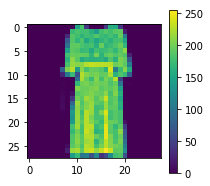

Image (#1902): Which is label number '3', or label 'Dress''


In [4]:
labelNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
sample = 1902 
each = x_train[sample]

plt.figure(figsize=(3,3))
plt.imshow(each)
plt.colorbar()
plt.show()
print("Image (#{}): Which is label number '{}', or label '{}''".format(sample,y_train[sample], labelNames[y_train[sample]]))

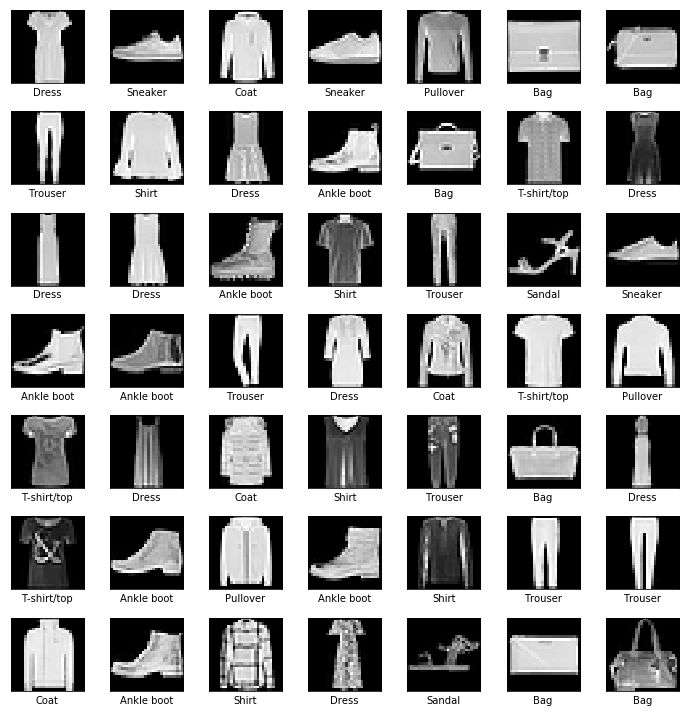

In [5]:
#Sample images
ROW = 7
COLUMN = 7
plt.figure(figsize=(10, 10)) 
for i in range(ROW * COLUMN):
    temp = random.randint(0, len(x_train)+1)
    image = x_train[temp] 
    plt.subplot(ROW, COLUMN, i+1)       
    plt.imshow(image, cmap='gray')  
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labelNames[y_train[temp]])
    plt.tight_layout()   
    
plt.show()

# Classic ML models

* In this section I examine the following Machine Learning Models without using any features extraction method:
    - SVM
    - KNN
    - Random Forest
    - Decision Tree

In [6]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [7]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [25]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# SVM Model
start1 = time.time()

svc = SVC(C=1, kernel='linear', gamma="auto")
svc.fit(x_train, y_train)

end1 = time.time()
svm_time = end1-start1

# KNN Model
start2 = time.time()

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

end2 = time.time()
knn_time = end2-start2

# Random Forest
start3 = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(x_train, y_train)

end3 = time.time()
forest_time = end3-start3

# Decision Tree
start4 = time.time()

tree = DecisionTreeClassifier(max_depth=100, criterion='entropy')
tree.fit(x_train, y_train)

end4 = time.time()
tree_time = end4-start4

print("SVM Time: {:0.2f} minute".format(svm_time/60.0))
print("KNN Time: {:0.2f} minute".format(knn_time/60.0))
print("Random Forest Time: {:0.2f} minute".format(forest_time/60.0))
print("Decision Tree Time: {:0.2f} minute".format(tree_time/60.0))

SVM Time: 54.48 minute
KNN Time: 11.66 minute
Random Forest Time: 1.75 minute
Decision Tree Time: 0.70 minute


-----------------SVM Report---------------
F1 score: 0.6915779630154545
Accuracy score: 0.6966
Confusion matrix: 
 [[724   3  15 113  15  72  45   1  12   0]
 [ 24 881  12  61   9   6   6   0   1   0]
 [  9   0 500  13 170  63 237   0   8   0]
 [ 33   8   6 821  31  45  54   0   2   0]
 [  0   3 275  85 500  43  87   0   7   0]
 [  0   0   0   1   0 786   1 150   2  60]
 [205   1 153  76 179 110 253   1  22   0]
 [  0   0   0   0   0  94   0 829   0  77]
 [  2   2  32  34   9  86  16  38 779   2]
 [  0   0   0   2   1  44   2  57   1 893]]
Plotting confusion matrix


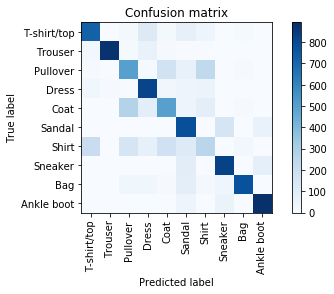

             precision    recall  f1-score   support

          0       0.73      0.72      0.73      1000
          1       0.98      0.88      0.93      1000
          2       0.50      0.50      0.50      1000
          3       0.68      0.82      0.74      1000
          4       0.55      0.50      0.52      1000
          5       0.58      0.79      0.67      1000
          6       0.36      0.25      0.30      1000
          7       0.77      0.83      0.80      1000
          8       0.93      0.78      0.85      1000
          9       0.87      0.89      0.88      1000

avg / total       0.70      0.70      0.69     10000



In [26]:
# SVM report and analysis
y_pred_svc = svc.predict(x_test)
svc_f1 = metrics.f1_score(y_test, y_pred_svc, average= "weighted")
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
svc_cm = metrics.confusion_matrix(y_test, y_pred_svc)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Confusion matrix: \n", svc_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc))

-----------------K-nearest neighbors Report---------------
F1 score: 0.8546439722018904
Accuracy score: 0.8554
Confusion matrix: 
 [[855   1  17  16   3   1 100   1   6   0]
 [  8 968   4  12   4   0   3   0   1   0]
 [ 24   2 819  11  75   0  69   0   0   0]
 [ 41   8  15 860  39   0  34   0   3   0]
 [  2   1 126  26 773   0  71   0   1   0]
 [  1   0   0   0   0 822   5  96   1  75]
 [176   1 132  23  80   0 575   0  13   0]
 [  0   0   0   0   0   3   0 961   0  36]
 [  2   0  10   4   7   0  16   7 953   1]
 [  0   0   0   0   0   2   1  29   0 968]]
Plotting confusion matrix


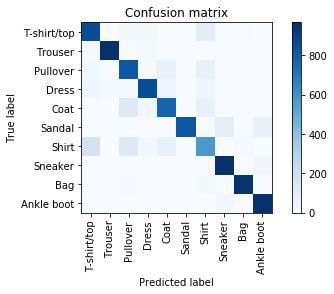

             precision    recall  f1-score   support

          0       0.77      0.85      0.81      1000
          1       0.99      0.97      0.98      1000
          2       0.73      0.82      0.77      1000
          3       0.90      0.86      0.88      1000
          4       0.79      0.77      0.78      1000
          5       0.99      0.82      0.90      1000
          6       0.66      0.57      0.61      1000
          7       0.88      0.96      0.92      1000
          8       0.97      0.95      0.96      1000
          9       0.90      0.97      0.93      1000

avg / total       0.86      0.86      0.85     10000



In [27]:
# KNN report and analysis
knn_f1 = metrics.f1_score(y_test, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_f1))
print("Accuracy score: {}".format(knn_accuracy))
print("Confusion matrix: \n", knn_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_knn))

-----------------Random Forest Report---------------
F1 score: 0.8739383581005006
Accuracy score: 0.8755
Confusion matrix: 
 [[866   0  11  28   5   1  77   0  12   0]
 [  3 962   3  20   5   0   6   0   1   0]
 [ 13   0 796  11 120   0  58   0   2   0]
 [ 20   2  10 908  32   0  25   0   2   1]
 [  1   0  97  36 816   0  48   0   2   0]
 [  0   0   0   1   0 957   0  31   1  10]
 [158   1 121  30  86   0 583   0  21   0]
 [  0   0   0   0   0  10   0 951   0  39]
 [  0   2   6   3   4   2   5   4 973   1]
 [  0   0   0   0   0   9   0  45   3 943]]
Plotting confusion matrix


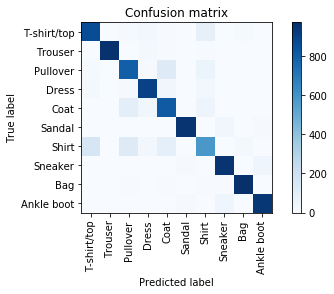

             precision    recall  f1-score   support

          0       0.82      0.87      0.84      1000
          1       0.99      0.96      0.98      1000
          2       0.76      0.80      0.78      1000
          3       0.88      0.91      0.89      1000
          4       0.76      0.82      0.79      1000
          5       0.98      0.96      0.97      1000
          6       0.73      0.58      0.65      1000
          7       0.92      0.95      0.94      1000
          8       0.96      0.97      0.96      1000
          9       0.95      0.94      0.95      1000

avg / total       0.87      0.88      0.87     10000



In [28]:
# Random Forest report and analysis
y_pred_forest = random_forest.predict(x_test)
random_forest_f1 = metrics.f1_score(y_test, y_pred_forest, average= "weighted")
random_forest_accuracy = metrics.accuracy_score(y_test, y_pred_forest)
random_forest_cm = metrics.confusion_matrix(y_test, y_pred_forest)
print("-----------------Random Forest Report---------------")
print("F1 score: {}".format(random_forest_f1))
print("Accuracy score: {}".format(random_forest_accuracy))
print("Confusion matrix: \n", random_forest_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(random_forest_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_forest))

-----------------Decision Tree Report---------------
F1 score: 0.8010979874804143
Accuracy score: 0.8006
Confusion matrix: 
 [[730   3  22  45  12   1 172   1  13   1]
 [  6 948   2  29   6   0   7   0   2   0]
 [ 20   1 686  14 142   0 129   0   7   1]
 [ 41  35  17 789  58   0  49   0  10   1]
 [ 10   2 153  42 677   0 110   0   6   0]
 [  0   1   1   2   1 894   1  68   6  26]
 [145   7 125  41 104   1 554   0  23   0]
 [  0   0   0   0   0  46   0 895   7  52]
 [  8   2   9   3   3  13  18   8 929   7]
 [  1   0   0   1   0  18   0  71   5 904]]
Plotting confusion matrix


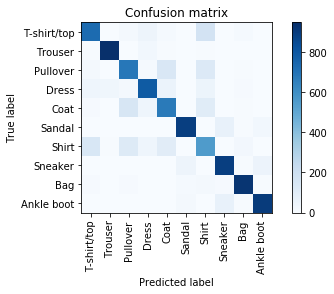

             precision    recall  f1-score   support

          0       0.76      0.73      0.74      1000
          1       0.95      0.95      0.95      1000
          2       0.68      0.69      0.68      1000
          3       0.82      0.79      0.80      1000
          4       0.67      0.68      0.68      1000
          5       0.92      0.89      0.91      1000
          6       0.53      0.55      0.54      1000
          7       0.86      0.90      0.88      1000
          8       0.92      0.93      0.93      1000
          9       0.91      0.90      0.91      1000

avg / total       0.80      0.80      0.80     10000



In [30]:
# Decision Tree report and analysis
y_pred_tree = tree.predict(x_test)
tree_f1 = metrics.f1_score(y_test, y_pred_tree, average= "weighted")
tree_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
tree_cm = metrics.confusion_matrix(y_test, y_pred_tree)
print("-----------------Decision Tree Report---------------")
print("F1 score: {}".format(tree_f1))
print("Accuracy score: {}".format(tree_accuracy))
print("Confusion matrix: \n", tree_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(tree_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_tree))

# CNN model

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, UpSampling2D, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from sklearn import metrics
from keras.optimizers import Adam, SGD
from keras.models import Model, load_model

Using TensorFlow backend.


In [44]:
# reshape the input into 4D array for CNN model
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[1], 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [45]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [15]:
# One hot encode the outcome
num_classes = 10

y_train_tf = keras.utils.to_categorical(y_train, num_classes)
y_test_tf = keras.utils.to_categorical(y_test, num_classes)

In [16]:
y_train_tf.shape

(60000, 10)

In [16]:
checkpointer = ModelCheckpoint(filepath="save/cnn_mnist.hdf5", verbose=0, save_best_only=True) # save best model
input_shape = (28, 28, 1)
learning_rate = 0.001

#Build network
model = Sequential()

model.add(Conv2D(96, kernel_size=(3, 3), strides=(1, 1), padding='valid',
                 activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=input_shape)) 
model.add(Conv2D(96, kernel_size=(3, 3), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(0.45)) 

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(0.45)) 

model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(0.45)) 

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_tf.shape[1], activation='softmax'))

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=learning_rate), metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 96)        83040     
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 96)        384       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 96)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 96)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 128)       110720    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)         147584    
__________

In [74]:
start = time.time()

history = model.fit(x_train,y_train_tf, validation_split=0.2, callbacks=[monitor,checkpointer],
                    verbose=1,epochs=50, batch_size=64, shuffle=True)      

end = time.time()
cnn_mnist_time = end-start
print("Total training time is {:0.2f} minute".format(cnn_mnist_time/60.0))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 18s 374us/step - loss: 1.5080 - acc: 0.6949 - val_loss: 1.0412 - val_acc: 0.7972
Epoch 2/50
48000/48000 [==============================] - 15s 306us/step - loss: 0.9333 - acc: 0.8205 - val_loss: 0.7553 - val_acc: 0.8589
Epoch 3/50
48000/48000 [==============================] - 15s 306us/step - loss: 0.7503 - acc: 0.8486 - val_loss: 0.6543 - val_acc: 0.8707
Epoch 4/50
48000/48000 [==============================] - 15s 307us/step - loss: 0.6791 - acc: 0.8589 - val_loss: 0.6253 - val_acc: 0.8618
Epoch 5/50
48000/48000 [==============================] - 15s 307us/step - loss: 0.6484 - acc: 0.8624 - val_loss: 0.6052 - val_acc: 0.8747
Epoch 6/50
48000/48000 [==============================] - 15s 307us/step - loss: 0.6287 - acc: 0.8688 - val_loss: 0.5899 - val_acc: 0.8688
Epoch 7/50
48000/48000 [==============================] - 15s 317us/step - loss: 0.6065 - acc: 0.8734 - val_loss: 0.

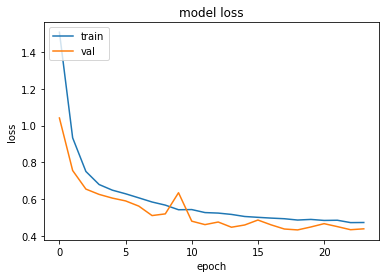

In [75]:
# plot summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [35]:
model.load_weights("save/cnn_mnist.hdf5")

-----------------Convolutional Neural Network Report---------------
F1 score: 0.8947538021930302
Accuracy score: 0.8954
Confusion matrix: 
 [[853   2  21  10   3   1 101   0   9   0]
 [  1 977   0  12   2   0   6   0   2   0]
 [ 14   0 907   7  47   0  24   0   1   0]
 [ 15   5  13 830  82   0  54   0   1   0]
 [  0   2  50  12 901   0  32   0   3   0]
 [  0   0   0   1   0 961   0  29   1   8]
 [119   0  88  19 122   0 648   0   4   0]
 [  0   0   0   0   0   2   0 996   0   2]
 [  1   0   6   1   5   2   6   5 974   0]
 [  0   0   0   0   0   5   0  88   0 907]]
Plotting confusion matrix


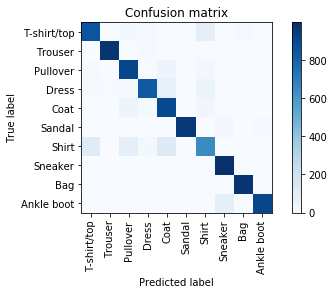

             precision    recall  f1-score   support

          0       0.85      0.85      0.85      1000
          1       0.99      0.98      0.98      1000
          2       0.84      0.91      0.87      1000
          3       0.93      0.83      0.88      1000
          4       0.78      0.90      0.83      1000
          5       0.99      0.96      0.98      1000
          6       0.74      0.65      0.69      1000
          7       0.89      1.00      0.94      1000
          8       0.98      0.97      0.98      1000
          9       0.99      0.91      0.95      1000

avg / total       0.90      0.90      0.89     10000



In [48]:
cnn_pred_mnist = model.predict(x_test)
cnn_pred_mnist = np.argmax(cnn_pred_mnist,axis=1)
y_true = np.argmax(y_test_tf,axis=1)

cnn_f1_mnist = metrics.f1_score(y_true, cnn_pred_mnist, average= "weighted")
cnn_accuracy_mnist = metrics.accuracy_score(y_true, cnn_pred_mnist)
cnn_cm_mnist = metrics.confusion_matrix(y_true, cnn_pred_mnist)
print("-----------------Convolutional Neural Network Report---------------")
print("F1 score: {}".format(cnn_f1_mnist))
print("Accuracy score: {}".format(cnn_accuracy_mnist))
print("Confusion matrix: \n", cnn_cm_mnist)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cnn_cm_mnist, labelNames)
plt.show()

print(metrics.classification_report(y_true, cnn_pred_mnist))

# Features Extraction using PCA

In this section, I attempt to use PCA to reduce the number of features

In [12]:
from sklearn.decomposition import PCA

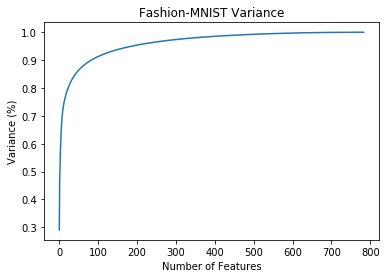

In [9]:
# fit the PCA with the training data
pca = PCA().fit(x_train)

# Plot the cumulative sum of eigenvalues
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)') #for each component
plt.title('Fashion-MNIST Variance')
plt.show()

The Variance graph showed that by using around 340 features, we can retain approximately 96% of the data.

In [10]:
pca = PCA(n_components=340)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=340, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [12]:
x_train_pca.shape

(60000, 340)

# Apply the models using PCA extracted features

The following models are used:  
- SVM
- KNN
- Random Forest
- Decision Tree
- CNN

In [13]:
# SVM Model
start1 = time.time()

svc = SVC(C=1, kernel='linear', gamma="auto")
svc.fit(x_train_pca, y_train)

end1 = time.time()
svm_pca_time = end1-start1

# KNN Model
start2 = time.time()

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_pca, y_train)
y_pred_knn_pca = knn.predict(x_test_pca)

end2 = time.time()
knn_pca_time = end2-start2

# Random Forest
start3 = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(x_train_pca, y_train)

end3 = time.time()
forest_pca_time = end3-start3

# Decision Tree
start4 = time.time()

tree = DecisionTreeClassifier(max_depth=100, criterion='entropy')
tree.fit(x_train_pca, y_train)

end4 = time.time()
tree_pca_time = end4-start4

print("SVM Time: {:0.2f} minute".format(svm_pca_time/60.0))
print("KNN Time: {:0.2f} minute".format(knn_pca_time/60.0))
print("Random Forest Time: {:0.2f} minute".format(forest_pca_time/60.0))
print("Decision Tree Time: {:0.2f} minute".format(tree_pca_time/60.0))

C:\Users\hgdan\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


SVM Time: 4.88 minute
KNN Time: 1.28 minute
Random Forest Time: 6.56 minute
Decision Tree Time: 1.52 minute


-----------------SVM Report---------------
F1 score: 0.848963139799533
Accuracy score: 0.8499
Confusion matrix: 
 [[827   6  11  45   3   1  95   0  12   0]
 [  5 961   4  24   4   0   1   0   1   0]
 [ 20   7 766   9 112   0  80   0   6   0]
 [ 46  19  12 856  29   0  32   0   6   0]
 [  1   2 111  40 766   0  77   0   3   0]
 [  1   0   0   1   0 930   0  47   2  19]
 [155   1 124  39  82   0 579   0  20   0]
 [  0   0   0   0   0  33   0 940   1  26]
 [ 10   2  11   7   5  13  19   5 928   0]
 [  0   0   0   0   0  14   1  39   0 946]]
Plotting confusion matrix


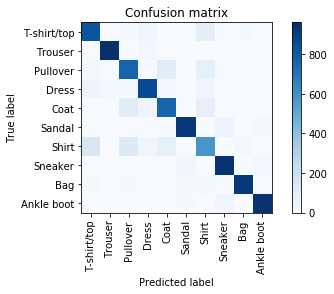

             precision    recall  f1-score   support

          0       0.78      0.83      0.80      1000
          1       0.96      0.96      0.96      1000
          2       0.74      0.77      0.75      1000
          3       0.84      0.86      0.85      1000
          4       0.77      0.77      0.77      1000
          5       0.94      0.93      0.93      1000
          6       0.65      0.58      0.61      1000
          7       0.91      0.94      0.93      1000
          8       0.95      0.93      0.94      1000
          9       0.95      0.95      0.95      1000

avg / total       0.85      0.85      0.85     10000



In [14]:
# SVM report and analysis
y_pred_svc_pca = svc.predict(x_test_pca)
svc_pca_f1 = metrics.f1_score(y_test, y_pred_svc_pca, average= "weighted")
svc_pca_accuracy = metrics.accuracy_score(y_test, y_pred_svc_pca)
svc_pca_cm = metrics.confusion_matrix(y_test, y_pred_svc_pca)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_pca_f1))
print("Accuracy score: {}".format(svc_pca_accuracy))
print("Confusion matrix: \n", svc_pca_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_pca_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc_pca))

-----------------K-nearest neighbors Report---------------
F1 score: 0.8590702229452561
Accuracy score: 0.8597
Confusion matrix: 
 [[853   1  17  16   4   1 100   1   7   0]
 [  8 969   4  12   4   0   2   0   1   0]
 [ 22   2 812  12  87   0  65   0   0   0]
 [ 39  10  15 864  38   0  31   0   3   0]
 [  2   1 125  25 771   0  73   0   3   0]
 [  1   0   0   0   0 844   2  87   2  64]
 [169   2 124  23  77   0 595   0  10   0]
 [  0   0   0   0   0   5   0 960   0  35]
 [  1   0  11   5   8   0  11   7 956   1]
 [  0   0   0   0   0   1   1  25   0 973]]
Plotting confusion matrix


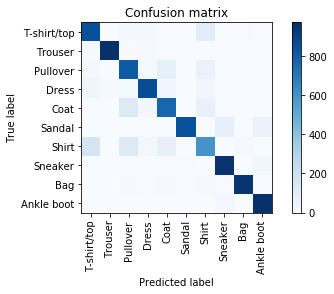

             precision    recall  f1-score   support

          0       0.78      0.85      0.81      1000
          1       0.98      0.97      0.98      1000
          2       0.73      0.81      0.77      1000
          3       0.90      0.86      0.88      1000
          4       0.78      0.77      0.78      1000
          5       0.99      0.84      0.91      1000
          6       0.68      0.59      0.63      1000
          7       0.89      0.96      0.92      1000
          8       0.97      0.96      0.96      1000
          9       0.91      0.97      0.94      1000

avg / total       0.86      0.86      0.86     10000



In [15]:
# KNN report and analysis
knn_pca_f1 = metrics.f1_score(y_test, y_pred_knn_pca, average= "weighted")
knn_pca_accuracy = metrics.accuracy_score(y_test, y_pred_knn_pca)
knn_pca_cm = metrics.confusion_matrix(y_test, y_pred_knn_pca)
print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_pca_f1))
print("Accuracy score: {}".format(knn_pca_accuracy))
print("Confusion matrix: \n", knn_pca_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_pca_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_knn_pca))

-----------------Random Forest Report---------------
F1 score: 0.850230588006948
Accuracy score: 0.8533
Confusion matrix: 
 [[860   0  17  36   5   3  60   0  19   0]
 [  7 955   6  24   5   0   1   0   2   0]
 [ 14   0 793  13 108   1  62   0   9   0]
 [ 31   4   5 888  32   1  33   0   6   0]
 [  5   0 109  39 788   2  47   0  10   0]
 [  1   0   0   1   0 910   0  46   4  38]
 [206   1 135  31  88   1 507   0  31   0]
 [  0   0   0   0   0  29   0 931   0  40]
 [  4   1   4   8   6  14   4   4 954   1]
 [  0   0   0   0   0  17   0  35   1 947]]
Plotting confusion matrix


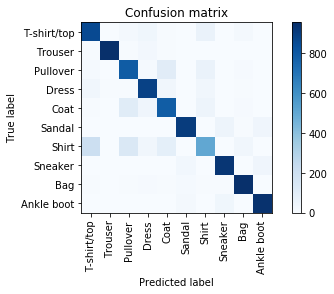

             precision    recall  f1-score   support

          0       0.76      0.86      0.81      1000
          1       0.99      0.95      0.97      1000
          2       0.74      0.79      0.77      1000
          3       0.85      0.89      0.87      1000
          4       0.76      0.79      0.78      1000
          5       0.93      0.91      0.92      1000
          6       0.71      0.51      0.59      1000
          7       0.92      0.93      0.92      1000
          8       0.92      0.95      0.94      1000
          9       0.92      0.95      0.93      1000

avg / total       0.85      0.85      0.85     10000



In [16]:
# Random Forest report and analysis
y_pred_forest_pca = random_forest.predict(x_test_pca)
random_forest_pca_f1 = metrics.f1_score(y_test, y_pred_forest_pca, average= "weighted")
random_forest_pca_accuracy = metrics.accuracy_score(y_test, y_pred_forest_pca)
random_forest_pca_cm = metrics.confusion_matrix(y_test, y_pred_forest_pca)
print("-----------------Random Forest Report---------------")
print("F1 score: {}".format(random_forest_pca_f1))
print("Accuracy score: {}".format(random_forest_pca_accuracy))
print("Confusion matrix: \n", random_forest_pca_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(random_forest_pca_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_forest_pca))

-----------------Decision Tree Report---------------
F1 score: 0.7671351272353514
Accuracy score: 0.7665
Confusion matrix: 
 [[710   9  18  50  13   2 178   1  19   0]
 [  7 938   5  33   8   0   6   0   3   0]
 [ 34   8 632  15 152   1 146   0  11   1]
 [ 59  38  27 749  53   2  62   0  10   0]
 [  9   4 172  43 633   1 122   1  14   1]
 [  0   0   1   1   0 851   5  78   9  55]
 [153  11 138  38 122   3 504   1  30   0]
 [  0   0   0   0   0  60   0 866  11  63]
 [ 14   3  16   5  14  14  31   8 891   4]
 [  1   0   1   1   1  41   0  60   4 891]]
Plotting confusion matrix


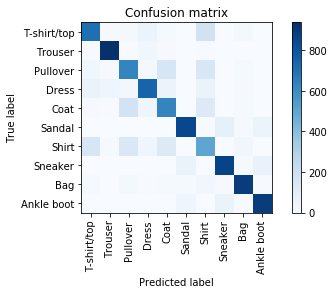

             precision    recall  f1-score   support

          0       0.72      0.71      0.71      1000
          1       0.93      0.94      0.93      1000
          2       0.63      0.63      0.63      1000
          3       0.80      0.75      0.77      1000
          4       0.64      0.63      0.63      1000
          5       0.87      0.85      0.86      1000
          6       0.48      0.50      0.49      1000
          7       0.85      0.87      0.86      1000
          8       0.89      0.89      0.89      1000
          9       0.88      0.89      0.88      1000

avg / total       0.77      0.77      0.77     10000



In [18]:
# Decision Tree report and analysis
y_pred_tree_pca = tree.predict(x_test_pca)
tree_pca_f1 = metrics.f1_score(y_test, y_pred_tree_pca, average= "weighted")
tree_pca_accuracy = metrics.accuracy_score(y_test, y_pred_tree_pca)
tree_pca_cm = metrics.confusion_matrix(y_test, y_pred_tree_pca)
print("-----------------Decision Tree Report---------------")
print("F1 score: {}".format(tree_pca_f1))
print("Accuracy score: {}".format(tree_pca_accuracy))
print("Confusion matrix: \n", tree_pca_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(tree_pca_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_tree_pca))

In [13]:
x_train_pca_cnn = x_train_pca.reshape(x_train_pca.shape[0], x_train_pca.shape[1], 1, 1)
x_test_pca_cnn = x_test_pca.reshape(x_test_pca.shape[0], x_test_pca.shape[1], 1, 1)
print(x_train_pca_cnn.shape)
print(x_test_pca_cnn.shape)

(60000, 340, 1, 1)
(10000, 340, 1, 1)


In [30]:
checkpointer = ModelCheckpoint(filepath="save/cnn_pca_mnist.hdf5", verbose=0, save_best_only=True) # save best model
input_shape = (340, 1, 1)
learning_rate = 0.001

#Build network
model = Sequential()

model.add(Conv2D(96, kernel_size=(3, 1), strides=(1, 1), padding='valid',
                 activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=input_shape)) 
model.add(Conv2D(96, kernel_size=(3, 1), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 1), strides=None, padding='valid'))
model.add(Dropout(0.57)) 

model.add(Conv2D(128, kernel_size=(3, 1), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(Conv2D(128, kernel_size=(3, 1), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 1), strides=None, padding='valid'))
model.add(Dropout(0.57)) 

model.add(Conv2D(256, kernel_size=(3, 1), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Conv2D(256, kernel_size=(3, 1), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 1), strides=None, padding='valid'))
model.add(Dropout(0.57)) 

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(y_train_tf.shape[1], activation='softmax'))

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=learning_rate), metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 338, 1, 96)        384       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 336, 1, 96)        27744     
_________________________________________________________________
batch_normalization_7 (Batch (None, 336, 1, 96)        384       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 168, 1, 96)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 168, 1, 96)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 166, 1, 128)       36992     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 164, 1, 128)       49280     
__________

In [32]:
start = time.time()

history = model.fit(x_train_pca_cnn,y_train_tf, validation_split=0.2, callbacks=[monitor,checkpointer],
                    verbose=1,epochs=50, batch_size=256, shuffle=True)      

end = time.time()
cnn_mnist_time = end-start
print("Total training time is {:0.2f} minute".format(cnn_mnist_time/60.0))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 10s 213us/step - loss: 2.9049 - acc: 0.1124 - val_loss: 3.1868 - val_acc: 0.1357
Epoch 2/50
48000/48000 [==============================] - 10s 214us/step - loss: 2.8271 - acc: 0.1346 - val_loss: 3.2940 - val_acc: 0.1489
Epoch 3/50
48000/48000 [==============================] - 10s 211us/step - loss: 2.6512 - acc: 0.1976 - val_loss: 2.5975 - val_acc: 0.2987
Epoch 4/50
48000/48000 [==============================] - 10s 214us/step - loss: 2.3787 - acc: 0.2951 - val_loss: 2.1794 - val_acc: 0.3494
Epoch 5/50
48000/48000 [==============================] - 10s 212us/step - loss: 2.0650 - acc: 0.3930 - val_loss: 1.5788 - val_acc: 0.5448
Epoch 6/50
48000/48000 [==============================] - 10s 212us/step - loss: 1.7159 - acc: 0.5038 - val_loss: 1.3264 - val_acc: 0.6761
Epoch 7/50
48000/48000 [==============================] - 10s 213us/step - loss: 1.4520 - acc: 0.5998 - val_loss: 1.

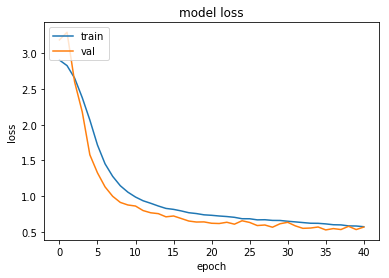

In [33]:
# plot summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [34]:
model.load_weights("save/cnn_pca_mnist.hdf5")

-----------------Convolutional Neural Network Report---------------
F1 score: 0.8584421576769817
Accuracy score: 0.8613
Confusion matrix: 
 [[873   0  25  31   1   0  47   0  23   0]
 [  5 954   3  30   3   0   2   0   3   0]
 [ 12   0 781  17 101   1  70   0  18   0]
 [ 40   2  11 893  34   1  11   0   8   0]
 [  1   0  79  39 791   0  80   0  10   0]
 [  1   0   0   3   0 924   0  55   3  14]
 [225   0 118  29  78   0 523   0  27   0]
 [  0   0   0   0   0  18   0 960   1  21]
 [  2   1   1   6   4   4   5   4 973   0]
 [  0   0   0   0   0  12   0  45   2 941]]
Plotting confusion matrix


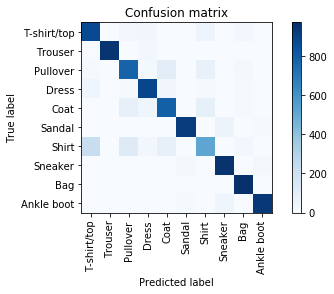

             precision    recall  f1-score   support

          0       0.75      0.87      0.81      1000
          1       1.00      0.95      0.97      1000
          2       0.77      0.78      0.77      1000
          3       0.85      0.89      0.87      1000
          4       0.78      0.79      0.79      1000
          5       0.96      0.92      0.94      1000
          6       0.71      0.52      0.60      1000
          7       0.90      0.96      0.93      1000
          8       0.91      0.97      0.94      1000
          9       0.96      0.94      0.95      1000

avg / total       0.86      0.86      0.86     10000



In [35]:
cnn_pca_pred_mnist = model.predict(x_test_pca_cnn)
cnn_pca_pred_mnist = np.argmax(cnn_pca_pred_mnist,axis=1)
y_true = np.argmax(y_test_tf,axis=1)

cnn_pca_f1_mnist = metrics.f1_score(y_true, cnn_pca_pred_mnist, average= "weighted")
cnn_pca_accuracy_mnist = metrics.accuracy_score(y_true, cnn_pca_pred_mnist)
cnn_pca_cm_mnist = metrics.confusion_matrix(y_true, cnn_pca_pred_mnist)
print("-----------------Convolutional Neural Network Report---------------")
print("F1 score: {}".format(cnn_pca_f1_mnist))
print("Accuracy score: {}".format(cnn_pca_accuracy_mnist))
print("Confusion matrix: \n", cnn_pca_cm_mnist)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cnn_pca_cm_mnist, labelNames)
plt.show()

print(metrics.classification_report(y_true, cnn_pca_pred_mnist))

# Features Extraction using AutoEncoder

In this section, I will use an Autoencoder to extract the features from the images

In [156]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [157]:
# One hot encode the label
y_train_tf = keras.utils.to_categorical(y_train, 10)
y_test_tf = keras.utils.to_categorical(y_test, 10)

In [158]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [159]:
filepath = "save/cnn_autoencoder.hdf5"
learning_rate = 0.001
checkpointer = ModelCheckpoint(filepath, verbose=0, save_best_only=True) # save best model
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=5, verbose=1, mode='auto')

input_size = (28, 28, 1)

input_image = Input(shape=input_size)

# Encoder
x = Conv2D(256, (3, 3), activation='relu', padding='same')(input_image)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same', name='encoded_layer')(x)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), padding='same')(x)

autoencoder = Model(input_image, decoded)
autoencoder.compile(optimizer=Adam(lr=learning_rate), loss='mse')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 28, 28, 256)       2560      
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 14, 14, 128)       295040    
_________________________________________________________________
encoded_layer (MaxPooling2D) (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 7, 7, 128)         147584    
_________________________________________________________________
up_sampling2d_29 (UpSampling (None, 14, 14, 128)       0         
__________

In [160]:
start = time.time()

history = autoencoder.fit(x_train,x_train, validation_split=0.2, callbacks=[monitor,checkpointer],verbose=1,epochs=50, batch_size=64, shuffle=True)    

end = time.time()
autoencoder_time = end-start
print("Total training time is {:0.2f} minute".format(autoencoder_time/60.0))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 20s 412us/step - loss: 0.0093 - val_loss: 0.0043
Epoch 2/50
48000/48000 [==============================] - 17s 360us/step - loss: 0.0036 - val_loss: 0.0030
Epoch 3/50
48000/48000 [==============================] - 17s 359us/step - loss: 0.0035 - val_loss: 0.0037
Epoch 4/50
48000/48000 [==============================] - 17s 364us/step - loss: 0.0028 - val_loss: 0.0025
Epoch 5/50
48000/48000 [==============================] - 17s 364us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 6/50
48000/48000 [==============================] - 17s 360us/step - loss: 0.0022 - val_loss: 0.0020
Epoch 7/50
48000/48000 [==============================] - 17s 361us/step - loss: 0.0020 - val_loss: 0.0018
Epoch 8/50
48000/48000 [==============================] - 17s 359us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 9/50
48000/48000 [==============================] - 17s 362us/step - loss: 0.0017 - val_

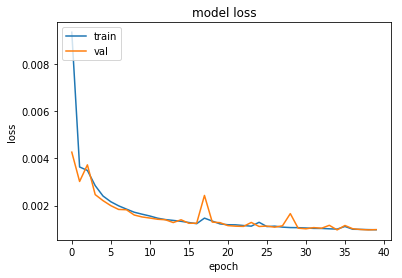

In [161]:
# plot summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [162]:
model = load_model('save/cnn_autoencoder.hdf5')
encoder_feature = Model(inputs=model.input, outputs=model.get_layer('encoded_layer').output)

encoder_feature.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 28, 28, 256)       2560      
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 14, 14, 128)       295040    
_________________________________________________________________
encoded_layer (MaxPooling2D) (None, 7, 7, 128)         0         
Total params: 297,600
Trainable params: 297,600
Non-trainable params: 0
_________________________________________________________________


In [163]:
autoencoder_features_train = encoder_feature.predict(x_train)
autoencoder_features_test = encoder_feature.predict(x_test)

In [164]:
autoencoder_features_train.shape

(60000, 7, 7, 128)

## Models using autoencoder extracted features

* The following models are used with the features extracted from autoencoder:
    - SVM
    - KNN
    - Random Forest
    - Decision Tree
    - CNN

In [165]:
autoencoder_features_train_flat = autoencoder_features_train.reshape(autoencoder_features_train.shape[0], autoencoder_features_train.shape[1] * autoencoder_features_train.shape[2] * autoencoder_features_train.shape[3])
autoencoder_features_test_flat = autoencoder_features_test.reshape(autoencoder_features_test.shape[0], autoencoder_features_test.shape[1] * autoencoder_features_test.shape[2] * autoencoder_features_test.shape[3])

In [166]:
autoencoder_features_test_flat.shape

(10000, 6272)

In [167]:
# SVM Model
start1 = time.time()

svc = SVC(C=1, kernel='linear', gamma="auto")
svc.fit(autoencoder_features_train_flat, y_train)

end1 = time.time()
svm_autoencoder_time = end1-start1

# KNN Model
start2 = time.time()

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(autoencoder_features_train_flat, y_train)
y_pred_knn_autoencoder = knn.predict(autoencoder_features_test_flat)

end2 = time.time()
knn_autoencoder_time = end2-start2

# Random Forest
start3 = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(autoencoder_features_train_flat, y_train)

end3 = time.time()
forest_autoencoder_time = end3-start3

# Decision Tree
start4 = time.time()

tree = DecisionTreeClassifier(max_depth=100, criterion='entropy')
tree.fit(autoencoder_features_train_flat, y_train)

end4 = time.time()
tree_autoencoder_time = end4-start4

print("SVM Time: {:0.2f} minute".format(svm_autoencoder_time/60.0))
print("KNN Time: {:0.2f} minute".format(knn_autoencoder_time/60.0))
print("Random Forest Time: {:0.2f} minute".format(forest_autoencoder_time/60.0))
print("Decision Tree Time: {:0.2f} minute".format(tree_autoencoder_time/60.0))

SVM Time: 33.29 minute
KNN Time: 46.54 minute
Random Forest Time: 10.23 minute
Decision Tree Time: 9.58 minute


-----------------SVM Report---------------
F1 score: 0.9110429492296965
Accuracy score: 0.9116
Confusion matrix: 
 [[882   0  16  20   2   1  72   0   7   0]
 [  0 986   1   6   3   0   2   0   2   0]
 [ 25   1 870   4  52   0  45   0   3   0]
 [ 23   5  16 911  21   0  21   0   3   0]
 [  3   1  50  30 869   0  47   0   0   0]
 [  0   0   0   0   0 979   0  14   1   6]
 [123   1  64  31  65   0 709   0   7   0]
 [  0   0   0   0   0   9   0 971   0  20]
 [  1   1   2   5   1   1   7   1 981   0]
 [  0   0   0   0   0   6   1  34   1 958]]
Plotting confusion matrix


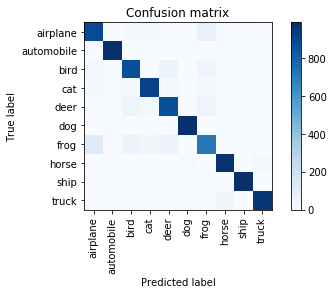

             precision    recall  f1-score   support

          0       0.83      0.88      0.86      1000
          1       0.99      0.99      0.99      1000
          2       0.85      0.87      0.86      1000
          3       0.90      0.91      0.91      1000
          4       0.86      0.87      0.86      1000
          5       0.98      0.98      0.98      1000
          6       0.78      0.71      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.98      0.98      0.98      1000
          9       0.97      0.96      0.97      1000

avg / total       0.91      0.91      0.91     10000



In [168]:
# SVM report and analysis
y_pred_svc_autoencoder = svc.predict(autoencoder_features_test_flat)
svc_autoencoder_f1 = metrics.f1_score(y_test, y_pred_svc_autoencoder, average= "weighted")
svc_autoencoder_accuracy = metrics.accuracy_score(y_test, y_pred_svc_autoencoder)
svc_autoencoder_cm = metrics.confusion_matrix(y_test, y_pred_svc_autoencoder)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_autoencoder_f1))
print("Accuracy score: {}".format(svc_autoencoder_accuracy))
print("Confusion matrix: \n", svc_autoencoder_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_autoencoder_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc_autoencoder))

-----------------K-nearest neighbors Report---------------
F1 score: 0.8590702229452561
Accuracy score: 0.8714
Confusion matrix: 
 [[857   1  19  21   7   1  90   0   4   0]
 [  3 971   3  15   5   0   2   0   1   0]
 [ 22   2 809  13  77   0  77   0   0   0]
 [ 32   7  14 885  33   0  28   0   1   0]
 [  1   1 104  31 792   0  70   0   1   0]
 [  0   0   1   0   0 879   0  67   1  52]
 [148   2 110  28  83   0 623   0   6   0]
 [  0   0   0   0   0   0   0 970   0  30]
 [  4   1   9   3   5   2  11   5 959   1]
 [  0   0   0   0   0   0   1  30   0 969]]
Plotting confusion matrix


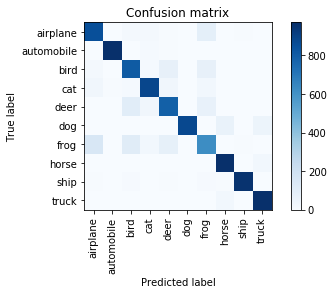

             precision    recall  f1-score   support

          0       0.80      0.86      0.83      1000
          1       0.99      0.97      0.98      1000
          2       0.76      0.81      0.78      1000
          3       0.89      0.89      0.89      1000
          4       0.79      0.79      0.79      1000
          5       1.00      0.88      0.93      1000
          6       0.69      0.62      0.66      1000
          7       0.90      0.97      0.94      1000
          8       0.99      0.96      0.97      1000
          9       0.92      0.97      0.94      1000

avg / total       0.87      0.87      0.87     10000



In [169]:
# KNN report and analysis
knn_autoencoder_f1 = metrics.f1_score(y_test, y_pred_knn_pca, average= "weighted")
knn_autoencoder_accuracy = metrics.accuracy_score(y_test, y_pred_knn_autoencoder)
knn_autoencoder_cm = metrics.confusion_matrix(y_test, y_pred_knn_autoencoder)
print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_autoencoder_f1))
print("Accuracy score: {}".format(knn_autoencoder_accuracy))
print("Confusion matrix: \n", knn_autoencoder_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_autoencoder_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_knn_autoencoder))

-----------------Random Forest Report---------------
F1 score: 0.8844721613512065
Accuracy score: 0.8858
Confusion matrix: 
 [[862   0  17  32   4   0  72   0  13   0]
 [  2 963   3  22   6   0   2   0   2   0]
 [  9   0 831  11  83   0  61   0   5   0]
 [ 18   3   8 904  33   0  31   0   3   0]
 [  1   0  64  39 843   0  51   0   2   0]
 [  0   0   0   0   0 953   0  32   2  13]
 [142   0  91  40 101   0 611   0  15   0]
 [  0   0   0   0   0  11   0 960   0  29]
 [  1   1   0   4   6   1   5   4 977   1]
 [  0   0   0   0   0   6   0  39   1 954]]
Plotting confusion matrix


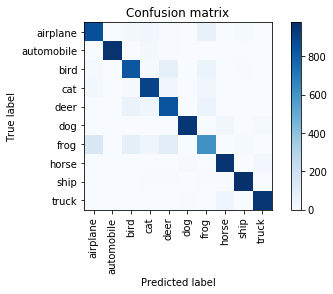

             precision    recall  f1-score   support

          0       0.83      0.86      0.85      1000
          1       1.00      0.96      0.98      1000
          2       0.82      0.83      0.83      1000
          3       0.86      0.90      0.88      1000
          4       0.78      0.84      0.81      1000
          5       0.98      0.95      0.97      1000
          6       0.73      0.61      0.67      1000
          7       0.93      0.96      0.94      1000
          8       0.96      0.98      0.97      1000
          9       0.96      0.95      0.96      1000

avg / total       0.88      0.89      0.88     10000



In [170]:
# Random Forest report and analysis
y_pred_forest_autoencoder = random_forest.predict(autoencoder_features_test_flat)
random_forest_autoencoder_f1 = metrics.f1_score(y_test, y_pred_forest_autoencoder, average= "weighted")
random_forest_autoencoder_accuracy = metrics.accuracy_score(y_test, y_pred_forest_autoencoder)
random_forest_autoencoder_cm = metrics.confusion_matrix(y_test, y_pred_forest_autoencoder)
print("-----------------Random Forest Report---------------")
print("F1 score: {}".format(random_forest_autoencoder_f1))
print("Accuracy score: {}".format(random_forest_autoencoder_accuracy))
print("Confusion matrix: \n", random_forest_autoencoder_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(random_forest_autoencoder_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_forest_autoencoder))

-----------------Decision Tree Report---------------
F1 score: 0.8023314869601746
Accuracy score: 0.8018
Confusion matrix: 
 [[735   1  23  54   9   4 162   0  12   0]
 [  6 948   2  29   4   0  10   0   1   0]
 [ 17   4 695   9 135   0 134   0   6   0]
 [ 45  31  22 788  59   0  47   0   8   0]
 [  8   5 133  56 686   1 106   0   5   0]
 [  0   0   0   1   1 889   1  64  17  27]
 [132  11 121  42 118   0 554   0  21   1]
 [  0   0   0   0   0  61   1 881   6  51]
 [  7   6   6   9   6  11  25   4 923   3]
 [  0   0   0   1   1  18   1  60   0 919]]
Plotting confusion matrix


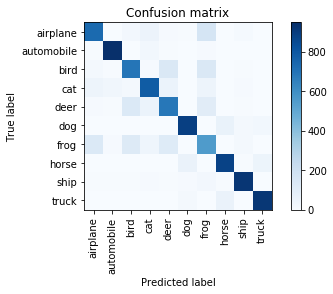

             precision    recall  f1-score   support

          0       0.77      0.73      0.75      1000
          1       0.94      0.95      0.95      1000
          2       0.69      0.69      0.69      1000
          3       0.80      0.79      0.79      1000
          4       0.67      0.69      0.68      1000
          5       0.90      0.89      0.90      1000
          6       0.53      0.55      0.54      1000
          7       0.87      0.88      0.88      1000
          8       0.92      0.92      0.92      1000
          9       0.92      0.92      0.92      1000

avg / total       0.80      0.80      0.80     10000



In [171]:
# Decision Tree report and analysis
y_pred_tree_autoencoder = tree.predict(autoencoder_features_test_flat)
tree_autoencoder_f1 = metrics.f1_score(y_test, y_pred_tree_autoencoder, average= "weighted")
tree_autoencoder_accuracy = metrics.accuracy_score(y_test, y_pred_tree_autoencoder)
tree_autoencoder_cm = metrics.confusion_matrix(y_test, y_pred_tree_autoencoder)
print("-----------------Decision Tree Report---------------")
print("F1 score: {}".format(tree_autoencoder_f1))
print("Accuracy score: {}".format(tree_autoencoder_accuracy))
print("Confusion matrix: \n", tree_autoencoder_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(tree_autoencoder_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_tree_autoencoder))

### CNN

In [193]:
checkpointer = ModelCheckpoint(filepath="save/cnn_autoencoder_mnist.hdf5", verbose=0, save_best_only=True) # save best model
input_shape = (7, 7, 128)
learning_rate = 0.001

#Build network
model = Sequential()

model.add(Conv2D(1024, kernel_size=(3, 3), strides=(1, 1), padding='valid',
                 activation='relu', input_shape=input_shape)) 
model.add(Conv2D(1024, kernel_size=(3, 3), strides=(1, 1), padding='valid',
                 activation='relu', input_shape=input_shape)) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(0.45))  

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_tf.shape[1], activation='softmax'))

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=learning_rate), metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_144 (Conv2D)          (None, 5, 5, 1024)        1180672   
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 3, 3, 1024)        9438208   
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 1, 1, 1024)        0         
_________________________________________________________________
dropout_82 (Dropout)         (None, 1, 1, 1024)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_59 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_83 (Dropout)         (None, 512)               0         
__________

In [200]:
start = time.time()

history = model.fit(autoencoder_features_train,y_train_tf, validation_split=0.2, callbacks=[monitor,checkpointer],
                    verbose=1,epochs=50, batch_size=64, shuffle=True)      

end = time.time()
cnn_autoencoder_time = end-start
print("Total training time is {:0.2f} minute".format(cnn_autoencoder_time/60.0))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 42s 874us/step - loss: 0.7041 - acc: 0.7368 - val_loss: 0.4247 - val_acc: 0.8418
Epoch 2/50
48000/48000 [==============================] - 30s 632us/step - loss: 0.4562 - acc: 0.8367 - val_loss: 0.3698 - val_acc: 0.8651
Epoch 3/50
48000/48000 [==============================] - 30s 627us/step - loss: 0.4011 - acc: 0.8563 - val_loss: 0.3487 - val_acc: 0.8758
Epoch 4/50
48000/48000 [==============================] - 31s 648us/step - loss: 0.3640 - acc: 0.8678 - val_loss: 0.3393 - val_acc: 0.8742
Epoch 5/50
48000/48000 [==============================] - 30s 630us/step - loss: 0.3401 - acc: 0.8782 - val_loss: 0.3390 - val_acc: 0.8738
Epoch 6/50
48000/48000 [==============================] - 30s 628us/step - loss: 0.3198 - acc: 0.8836 - val_loss: 0.3074 - val_acc: 0.8872
Epoch 7/50
48000/48000 [==============================] - 31s 640us/step - loss: 0.3128 - acc: 0.8875 - val_loss: 0.

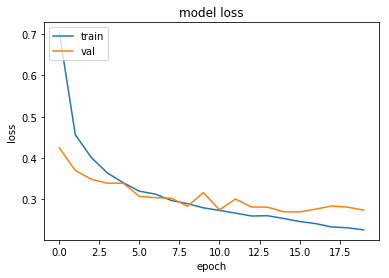

In [201]:
# plot summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [202]:
model.load_weights('save/cnn_autoencoder_mnist.hdf5') # load weights from best model

-----------------Convolutional Neural Network Report---------------

F1 score: 0.9027976561617339
Accuracy score: 0.9035
Confusion matrix: 
 [[869   1  20  23   5   0  80   0   2   0]
 [  0 978   0  15   2   0   4   0   1   0]
 [ 20   0 843  13  73   0  51   0   0   0]
 [  9   3   6 911  44   1  26   0   0   0]
 [  0   1  26  22 907   0  44   0   0   0]
 [  0   0   0   0   0 975   0  11   3  11]
 [125   2  67  38 104   0 662   0   2   0]
 [  0   0   0   0   0  16   0 961   2  21]
 [  4   1   3   3   5   1  10   0 972   1]
 [  1   0   0   0   0   7   0  34   1 957]]
Plotting confusion matrix


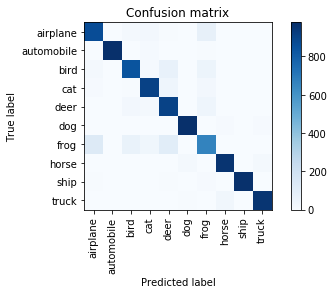

             precision    recall  f1-score   support

          0       0.85      0.87      0.86      1000
          1       0.99      0.98      0.98      1000
          2       0.87      0.84      0.86      1000
          3       0.89      0.91      0.90      1000
          4       0.80      0.91      0.85      1000
          5       0.97      0.97      0.97      1000
          6       0.75      0.66      0.71      1000
          7       0.96      0.96      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.97      0.96      0.96      1000

avg / total       0.90      0.90      0.90     10000



In [203]:
cnn_autoencoder_pred_mnist = model.predict(autoencoder_features_test)
cnn_autoencoder_pred_mnist = np.argmax(cnn_autoencoder_pred_mnist,axis=1)
y_true = np.argmax(y_test_tf,axis=1)

cnn_autoencoder_f1_mnist = metrics.f1_score(y_true, cnn_autoencoder_pred_mnist, average= "weighted")
cnn_autoencoder_accuracy = metrics.accuracy_score(y_true, cnn_autoencoder_pred_mnist)
cnn_autoencoder_cm_mnist = metrics.confusion_matrix(y_true, cnn_autoencoder_pred_mnist)
printmd("-----------------Convolutional Neural Network Report---------------")
print("F1 score: {}".format(cnn_autoencoder_f1_mnist))
print("Accuracy score: {}".format(cnn_autoencoder_accuracy))
print("Confusion matrix: \n", cnn_autoencoder_cm_mnist)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cnn_autoencoder_cm_mnist, labelNames)
plt.show()

print(metrics.classification_report(y_true, cnn_autoencoder_pred_mnist))

# CIFAR-10 dataset

The following information is taken from Keras website: https://keras.io/datasets/  
The CIFAR-10 dataset consists of 50,000 32x32 color training images of 10 categories, along with a test set of 10,000 images.  
The class labels for the data are:

| Label | Description | 
| --- | --- | 
| 0 | airplane |
| 1 | automobile |
| 2 | bird |
| 3 | cat |
| 4 | deer |
| 5 | dog |
| 6 | frog |
| 7 | horse |
| 8 | ship |
| 9 | truck |

In [4]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)

Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


Image (#1902): Which is label number '[7]', or label 'horse''


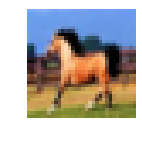

In [5]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
sample = 1902 
each = x_train[sample]

plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(each, interpolation='nearest')
print("Image (#{}): Which is label number '{}', or label '{}''".format(sample,y_train[sample], labelNames[y_train[sample][0]]))

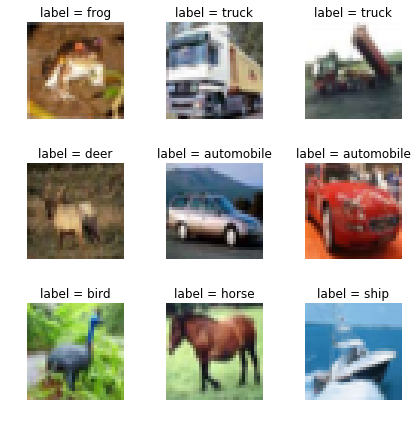

In [6]:
ROW = 3
COLUMN = 3
plt.figure(figsize=(6, 6)) 
for i in range(ROW * COLUMN):
    image = x_train[i] 
    plt.subplot(ROW, COLUMN, i+1)       
    plt.imshow(image, interpolation='nearest')  
    plt.title('label = {}'.format(labelNames[y_train[i][0]]))
    plt.axis('off')
    plt.tight_layout()   
    
plt.show()

In [7]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
x_train_flat = x_train.reshape(x_train.shape[0], x_train.shape[1]* x_train.shape[2]* x_train.shape[3])
x_test_flat = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2] * x_test.shape[3])
print(x_train_flat.shape)
print(x_test_flat.shape)

(50000, 3072)
(10000, 3072)


In [9]:
y_train = y_train.reshape(y_train.shape[0], )
y_test = y_test.reshape(y_test.shape[0], )
print(y_train.shape)
print(y_test.shape)

(50000,)
(10000,)


In [10]:
# One hot encode the outcome
num_classes = 10

# Converts a class vector (integers) to binary class matrix.   One-hot encoding!  Use with categorical_crossentropy.
y_train_tf = keras.utils.to_categorical(y_train, num_classes)
y_test_tf = keras.utils.to_categorical(y_test, num_classes)

In [11]:
y_train_tf.shape

(50000, 10)

# Classic ML models

* In this section I examine the following Machine Learning Models without using any features extraction method:
    - SVM
    - KNN
    - Random Forest
    - Decision Tree

In [184]:
# SVM Model
start1 = time.time()

svc = SVC(C=1, kernel='linear', gamma="auto")
svc.fit(x_train_flat, y_train)

end1 = time.time()
svm_time = end1-start1

# KNN Model
start2 = time.time()

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_flat, y_train)
y_pred_knn = knn.predict(x_test_flat)

end2 = time.time()
knn_time = end2-start2

# Random Forest
start3 = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(x_train_flat, y_train)

end3 = time.time()
forest_time = end3-start3

# Decision Tree
start4 = time.time()

tree = DecisionTreeClassifier(max_depth=100, criterion='entropy')
tree.fit(x_train_flat, y_train)

end4 = time.time()
tree_time = end4-start4

print("SVM Time: {:0.2f} minute".format(svm_time/60.0))
print("KNN Time: {:0.2f} minute".format(knn_time/60.0))
print("Random Forest Time: {:0.2f} minute".format(forest_time/60.0))
print("Decision Tree Time: {:0.2f} minute".format(tree_time/60.0))

C:\Users\hgdan\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hgdan\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\hgdan\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


SVM Time: 200.76 minute
KNN Time: 36.37 minute
Random Forest Time: 8.77 minute
Decision Tree Time: 6.13 minute


-----------------SVM Report---------------
F1 score: 0.3750694455154135
Accuracy score: 0.3753
Confusion matrix: 
 [[480  40  75  40  28  34  24  43 169  67]
 [ 81 433  45  48  27  46  37  37  66 180]
 [103  48 306  99 107  89 104  78  40  26]
 [ 57  65 130 257  71 177 127  44  34  38]
 [ 59  35 176  88 273  96 135  97  24  17]
 [ 57  52 128 195  96 291  63  60  34  24]
 [ 31  38 103 137 113  90 432  31  10  15]
 [ 73  62 101  80 114  87  34 373  24  52]
 [174  74  35  36  18  42  13  16 509  83]
 [103 208  26  34  25  25  44  59  77 399]]
Plotting confusion matrix


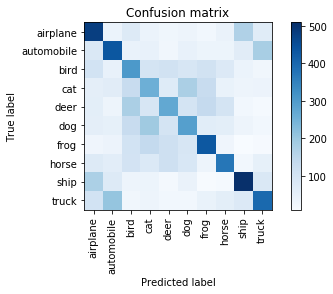

             precision    recall  f1-score   support

          0       0.39      0.48      0.43      1000
          1       0.41      0.43      0.42      1000
          2       0.27      0.31      0.29      1000
          3       0.25      0.26      0.26      1000
          4       0.31      0.27      0.29      1000
          5       0.30      0.29      0.29      1000
          6       0.43      0.43      0.43      1000
          7       0.45      0.37      0.41      1000
          8       0.52      0.51      0.51      1000
          9       0.44      0.40      0.42      1000

avg / total       0.38      0.38      0.38     10000



In [185]:
# SVM report and analysis
y_pred_svc = svc.predict(x_test_flat)
svc_f1 = metrics.f1_score(y_test, y_pred_svc, average= "weighted")
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
svc_cm = metrics.confusion_matrix(y_test, y_pred_svc)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Confusion matrix: \n", svc_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc))

In [189]:
y_pred_knn

array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

-----------------K-nearest neighbors Report---------------
F1 score: 0.3260170986061005
Accuracy score: 0.3398
Confusion matrix: 
 [[537   4 117  13  59   7  26   5 225   7]
 [139 205 110  42 155  36  61  10 217  25]
 [107   3 452  52 226  34  66   8  49   3]
 [ 70   8 234 217 193 115  95  17  46   5]
 [ 64   1 262  35 514  21  41   7  53   2]
 [ 71   3 227 155 187 220  66  14  51   6]
 [ 27   2 273  68 314  37 248   2  28   1]
 [ 93  10 181  50 280  52  53 210  67   4]
 [141  14  52  38  54  16  14   8 655   8]
 [153  67  98  68 124  23  46  29 252 140]]
Plotting confusion matrix


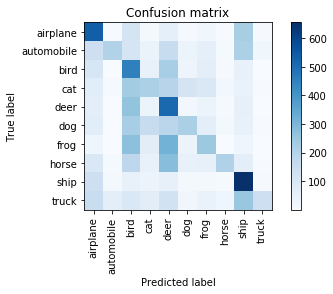

             precision    recall  f1-score   support

          0       0.38      0.54      0.45      1000
          1       0.65      0.20      0.31      1000
          2       0.23      0.45      0.30      1000
          3       0.29      0.22      0.25      1000
          4       0.24      0.51      0.33      1000
          5       0.39      0.22      0.28      1000
          6       0.35      0.25      0.29      1000
          7       0.68      0.21      0.32      1000
          8       0.40      0.66      0.50      1000
          9       0.70      0.14      0.23      1000

avg / total       0.43      0.34      0.33     10000



In [190]:
# KNN report and analysis
knn_f1 = metrics.f1_score(y_test_flat, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_test_flat, y_pred_knn)
knn_cm = metrics.confusion_matrix(y_test_flat, y_pred_knn)
print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_f1))
print("Accuracy score: {}".format(knn_accuracy))
print("Confusion matrix: \n", knn_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test_flat, y_pred_knn))

-----------------Random Forest Report---------------
F1 score: 0.4665727731317218
Accuracy score: 0.4712
Confusion matrix: 
 [[578  41  55  15  36  18  24  22 150  61]
 [ 32 554  16  33  21  25  39  29  65 186]
 [105  50 323  70 160  62 116  64  24  26]
 [ 55  50  69 265  74 179 153  62  25  68]
 [ 57  25 153  49 400  49 149  65  27  26]
 [ 42  30  76 153  80 392  94  70  28  35]
 [ 16  37  81  69 113  56 550  32   8  38]
 [ 45  49  48  55 102  73  51 459  27  91]
 [ 87  86  17  20  16  32  11  25 631  75]
 [ 49 162  15  35  18  18  26  41  76 560]]
Plotting confusion matrix


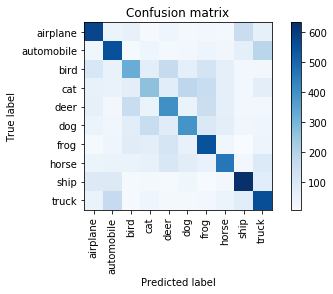

             precision    recall  f1-score   support

          0       0.54      0.58      0.56      1000
          1       0.51      0.55      0.53      1000
          2       0.38      0.32      0.35      1000
          3       0.35      0.27      0.30      1000
          4       0.39      0.40      0.40      1000
          5       0.43      0.39      0.41      1000
          6       0.45      0.55      0.50      1000
          7       0.53      0.46      0.49      1000
          8       0.59      0.63      0.61      1000
          9       0.48      0.56      0.52      1000

avg / total       0.47      0.47      0.47     10000



In [191]:
# Random Forest report and analysis
y_pred_forest = random_forest.predict(x_test_flat)
random_forest_f1 = metrics.f1_score(y_test_flat, y_pred_forest, average= "weighted")
random_forest_accuracy = metrics.accuracy_score(y_test_flat, y_pred_forest)
random_forest_cm = metrics.confusion_matrix(y_test_flat, y_pred_forest)
print("-----------------Random Forest Report---------------")
print("F1 score: {}".format(random_forest_f1))
print("Accuracy score: {}".format(random_forest_accuracy))
print("Confusion matrix: \n", random_forest_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(random_forest_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test_flat, y_pred_forest))

-----------------Decision Tree Report---------------
F1 score: 0.26739478762733676
Accuracy score: 0.2671
Confusion matrix: 
 [[345  63 113  57  61  49  24  53 160  75]
 [ 71 296  56  78  59  50  52  67 124 147]
 [108  48 211 107 147 106 100  87  27  59]
 [ 56  50 116 165 105 144 125 115  53  71]
 [ 46  40 149 100 222 106 153 110  35  39]
 [ 55  54 104 165  94 230  81 118  50  49]
 [ 39  60 137  98 134 105 289  63  27  48]
 [ 60  71 104  97 116  99  61 258  55  79]
 [143  99  51  50  48  49  25  54 375 106]
 [ 94 168  50  63  45  54  52  82 112 280]]
Plotting confusion matrix


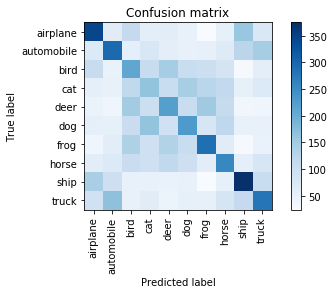

             precision    recall  f1-score   support

          0       0.34      0.34      0.34      1000
          1       0.31      0.30      0.30      1000
          2       0.19      0.21      0.20      1000
          3       0.17      0.17      0.17      1000
          4       0.22      0.22      0.22      1000
          5       0.23      0.23      0.23      1000
          6       0.30      0.29      0.29      1000
          7       0.26      0.26      0.26      1000
          8       0.37      0.38      0.37      1000
          9       0.29      0.28      0.29      1000

avg / total       0.27      0.27      0.27     10000



In [192]:
# Decision Tree report and analysis
y_pred_tree = tree.predict(x_test_flat)
tree_f1 = metrics.f1_score(y_test_flat, y_pred_tree, average= "weighted")
tree_accuracy = metrics.accuracy_score(y_test_flat, y_pred_tree)
tree_cm = metrics.confusion_matrix(y_test_flat, y_pred_tree)
print("-----------------Decision Tree Report---------------")
print("F1 score: {}".format(tree_f1))
print("Accuracy score: {}".format(tree_accuracy))
print("Confusion matrix: \n", tree_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(tree_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test_flat, y_pred_tree))

### CNN

In [12]:
checkpointer = ModelCheckpoint(filepath="save/cnn_cifar.hdf5", verbose=0, save_best_only=True) # save best model
input_shape = (32, 32, 3)
learning_rate = 0.001
weight_decay = 1e-4

#Build network
model = Sequential()

model.add(Conv2D(96, kernel_size=(3, 3), strides=(1, 1), padding='valid',
                 activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=input_shape)) 
model.add(Conv2D(96, kernel_size=(3, 3), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(0.45)) 

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(0.45)) 

model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(0.45)) 

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_tf.shape[1], activation='softmax'))

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=10, verbose=1, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=learning_rate), metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 96)        2688      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 96)        83040     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 96)        384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 96)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       110720    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 128)       147584    
__________

In [13]:
start = time.time()

history = model.fit(x_train,y_train_tf, validation_split=0.2, callbacks=[monitor,checkpointer],
                    verbose=1,epochs=50, batch_size=256, shuffle=True)      

end = time.time()
cnn_cifar_time = end-start
print("Total training time is {:0.2f} minute".format(cnn_cifar_time/60.0))

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 15s 370us/step - loss: 2.7615 - acc: 0.2612 - val_loss: 2.7737 - val_acc: 0.2648
Epoch 2/50
40000/40000 [==============================] - 11s 270us/step - loss: 2.1591 - acc: 0.4373 - val_loss: 2.1131 - val_acc: 0.4514
Epoch 3/50
40000/40000 [==============================] - 11s 275us/step - loss: 1.8648 - acc: 0.5236 - val_loss: 1.9360 - val_acc: 0.4576
Epoch 4/50
40000/40000 [==============================] - 11s 274us/step - loss: 1.6498 - acc: 0.5835 - val_loss: 1.9207 - val_acc: 0.4906
Epoch 5/50
40000/40000 [==============================] - 11s 267us/step - loss: 1.4959 - acc: 0.6254 - val_loss: 1.7545 - val_acc: 0.5439
Epoch 6/50
40000/40000 [==============================] - 11s 264us/step - loss: 1.3687 - acc: 0.6596 - val_loss: 1.6417 - val_acc: 0.5693
Epoch 7/50
40000/40000 [==============================] - 11s 271us/step - loss: 1.2777 - acc: 0.6896 - val_loss: 1.

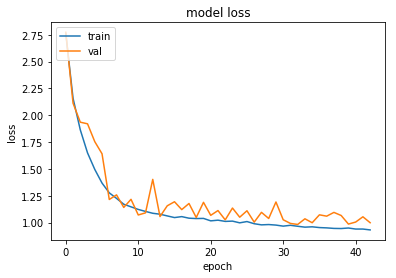

In [14]:
# plot summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

-----------------Convolutional Neural Network Report---------------
F1 score: 0.804774400442709
Accuracy score: 0.8037
Confusion matrix: 
 [[816  29  16  27  22   2  22  14  32  20]
 [  3 925   0   3   1   1  10   2   9  46]
 [ 61   7 641  85  53  52  76  20   5   0]
 [ 10  10  24 772  27  69  63  11   6   8]
 [  5   1  20  68 820  11  38  36   1   0]
 [  2   3  17 235  30 662  13  36   0   2]
 [  1   2  12  59   8  10 901   4   2   1]
 [ 10   1   8  77  32  20   7 844   0   1]
 [ 80  50  12  22   3   1  22   3 778  29]
 [ 13  62   3  20   6   0   9   3   6 878]]
Plotting confusion matrix


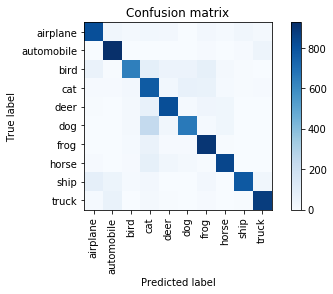

             precision    recall  f1-score   support

          0       0.82      0.82      0.82      1000
          1       0.85      0.93      0.89      1000
          2       0.85      0.64      0.73      1000
          3       0.56      0.77      0.65      1000
          4       0.82      0.82      0.82      1000
          5       0.80      0.66      0.72      1000
          6       0.78      0.90      0.83      1000
          7       0.87      0.84      0.86      1000
          8       0.93      0.78      0.85      1000
          9       0.89      0.88      0.88      1000

avg / total       0.82      0.80      0.80     10000



In [15]:
cnn_pred_cifar = model.predict(x_test)
cnn_pred_cifar = np.argmax(cnn_pred_cifar,axis=1)
y_true = np.argmax(y_test_tf,axis=1)

cnn_f1_cifar = metrics.f1_score(y_true, cnn_pred_cifar, average= "weighted")
cnn_accuracy_cifar = metrics.accuracy_score(y_true, cnn_pred_cifar)
cnn_cm_cifar = metrics.confusion_matrix(y_true, cnn_pred_cifar)
print("-----------------Convolutional Neural Network Report---------------")
print("F1 score: {}".format(cnn_f1_cifar))
print("Accuracy score: {}".format(cnn_accuracy_cifar))
print("Confusion matrix: \n", cnn_cm_cifar)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cnn_cm_cifar, labelNames)
plt.show()

print(metrics.classification_report(y_true, cnn_pred_cifar))

# Features Extraction using PCA

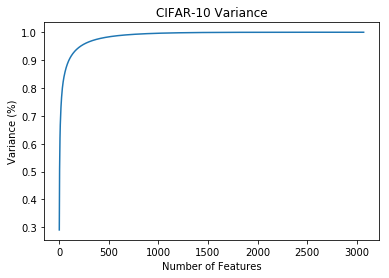

In [29]:
# fit the PCA with the training data
pca = PCA().fit(x_train_flat)

# Plot the cumulative sum of eigenvalues
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)') #for each component
plt.title('CIFAR-10 Variance')
plt.show()

The Variance graph showed that by using around 500 features, we can retain approximately 95% of the data.

In [21]:
pca = PCA(n_components=500)
pca.fit(x_train_flat)

PCA(copy=True, iterated_power='auto', n_components=500, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
x_train_pca = pca.transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

In [23]:
x_train_pca.shape

(50000, 500)

# Apply the models using PCA extracted features

In [19]:
# SVM Model
start1 = time.time()

svc = SVC(C=1, kernel='linear', gamma="auto")
svc.fit(x_train_pca, y_train)

end1 = time.time()
svm_pca_time = end1-start1

# KNN Model
start2 = time.time()

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_pca, y_train)
y_pred_knn_pca = knn.predict(x_test_pca)

end2 = time.time()
knn_pca_time = end2-start2

# Random Forest
start3 = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(x_train_pca, y_train)

end3 = time.time()
forest_pca_time = end3-start3

# Decision Tree
start4 = time.time()

tree = DecisionTreeClassifier(max_depth=100, criterion='entropy')
tree.fit(x_train_pca, y_train)

end4 = time.time()
tree_pca_time = end4-start4

print("SVM Time: {:0.2f} minute".format(svm_pca_time/60.0))
print("KNN Time: {:0.2f} minute".format(knn_pca_time/60.0))
print("Random Forest Time: {:0.2f} minute".format(forest_pca_time/60.0))
print("Decision Tree Time: {:0.2f} minute".format(tree_pca_time/60.0))

C:\Users\hgdan\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


SVM Time: 62.41 minute
KNN Time: 4.03 minute
Random Forest Time: 8.45 minute
Decision Tree Time: 2.37 minute


-----------------SVM Report---------------
F1 score: 0.4129597047292911
Accuracy score: 0.4138
Confusion matrix: 
 [[497  44  64  35  24  31  22  44 166  73]
 [ 57 497  42  45  20  41  32  42  65 159]
 [103  44 312 108  95  86 121  69  39  23]
 [ 42  69 109 298  64 170 139  32  32  45]
 [ 49  27 154  80 312  98 139  96  24  21]
 [ 46  52 117 197  79 318  70  60  39  22]
 [ 22  38  96 129  81  86 480  36   9  23]
 [ 58  48  84  74  95  86  32 435  25  63]
 [177  73  30  39  16  36  11  18 514  86]
 [ 92 180  21  24  20  25  41  50  72 475]]
Plotting confusion matrix


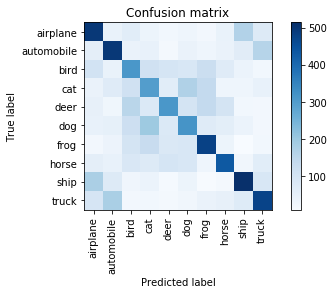

             precision    recall  f1-score   support

          0       0.43      0.50      0.46      1000
          1       0.46      0.50      0.48      1000
          2       0.30      0.31      0.31      1000
          3       0.29      0.30      0.29      1000
          4       0.39      0.31      0.35      1000
          5       0.33      0.32      0.32      1000
          6       0.44      0.48      0.46      1000
          7       0.49      0.43      0.46      1000
          8       0.52      0.51      0.52      1000
          9       0.48      0.47      0.48      1000

avg / total       0.41      0.41      0.41     10000



In [20]:
# SVM report and analysis
y_pred_svc_pca = svc.predict(x_test_pca)
svc_pca_f1 = metrics.f1_score(y_test, y_pred_svc_pca, average= "weighted")
svc_pca_accuracy = metrics.accuracy_score(y_test, y_pred_svc_pca)
svc_pca_cm = metrics.confusion_matrix(y_test, y_pred_svc_pca)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_pca_f1))
print("Accuracy score: {}".format(svc_pca_accuracy))
print("Confusion matrix: \n", svc_pca_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_pca_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc_pca))

-----------------K-nearest neighbors Report---------------
F1 score: 0.33719180284438127
Accuracy score: 0.3493
Confusion matrix: 
 [[552   6 115  14  54   6  30   4 212   7]
 [142 222 101  40 153  31  65   9 211  26]
 [117   3 448  49 225  30  71  11  42   4]
 [ 75   7 230 208 184 109 119  22  42   4]
 [ 67   2 267  33 513  16  47  10  44   1]
 [ 70   5 224 149 185 221  81  12  47   6]
 [ 23   1 248  68 300  33 298   1  27   1]
 [ 95  13 178  49 273  49  62 218  59   4]
 [140  14  54  34  56  15  15   8 658   6]
 [148  73  99  58 116  26  61  29 235 155]]
Plotting confusion matrix


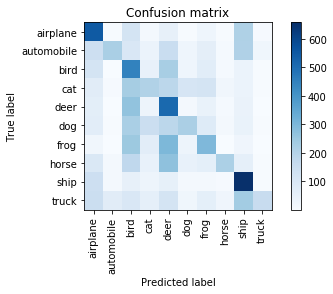

             precision    recall  f1-score   support

          0       0.39      0.55      0.45      1000
          1       0.64      0.22      0.33      1000
          2       0.23      0.45      0.30      1000
          3       0.30      0.21      0.24      1000
          4       0.25      0.51      0.34      1000
          5       0.41      0.22      0.29      1000
          6       0.35      0.30      0.32      1000
          7       0.67      0.22      0.33      1000
          8       0.42      0.66      0.51      1000
          9       0.72      0.15      0.26      1000

avg / total       0.44      0.35      0.34     10000



In [21]:
# KNN report and analysis
knn_pca_f1 = metrics.f1_score(y_test, y_pred_knn_pca, average= "weighted")
knn_pca_accuracy = metrics.accuracy_score(y_test, y_pred_knn_pca)
knn_pca_cm = metrics.confusion_matrix(y_test, y_pred_knn_pca)
print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_pca_f1))
print("Accuracy score: {}".format(knn_pca_accuracy))
print("Confusion matrix: \n", knn_pca_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_pca_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_knn_pca))

-----------------Random Forest Report---------------
F1 score: 0.3939007665382875
Accuracy score: 0.3983
Confusion matrix: 
 [[513  50  64  37  27  28  22  29 167  63]
 [ 56 522  20  39  17  35  22  29  78 182]
 [128  38 268  86 177  72 104  51  51  25]
 [ 59  52  98 226  68 197 127  67  48  58]
 [ 60  27 150  79 385  52 128  52  43  24]
 [ 51  54  93 195  89 306  69  70  47  26]
 [ 18  37  83  99 140  81 441  31  23  47]
 [ 63  70  64  92 108 101  53 312  38  99]
 [110  81  18  33  15  61  11  20 586  65]
 [ 65 215  14  49  18  24  30  43 118 424]]
Plotting confusion matrix


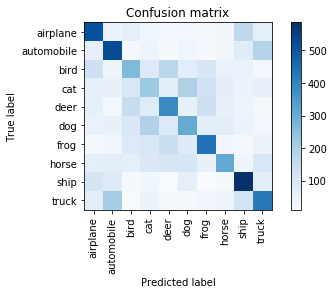

             precision    recall  f1-score   support

          0       0.46      0.51      0.48      1000
          1       0.46      0.52      0.49      1000
          2       0.31      0.27      0.29      1000
          3       0.24      0.23      0.23      1000
          4       0.37      0.39      0.38      1000
          5       0.32      0.31      0.31      1000
          6       0.44      0.44      0.44      1000
          7       0.44      0.31      0.37      1000
          8       0.49      0.59      0.53      1000
          9       0.42      0.42      0.42      1000

avg / total       0.39      0.40      0.39     10000



In [22]:
# Random Forest report and analysis
y_pred_forest_pca = random_forest.predict(x_test_pca)
random_forest_pca_f1 = metrics.f1_score(y_test, y_pred_forest_pca, average= "weighted")
random_forest_pca_accuracy = metrics.accuracy_score(y_test, y_pred_forest_pca)
random_forest_pca_cm = metrics.confusion_matrix(y_test, y_pred_forest_pca)
print("-----------------Random Forest Report---------------")
print("F1 score: {}".format(random_forest_pca_f1))
print("Accuracy score: {}".format(random_forest_pca_accuracy))
print("Confusion matrix: \n", random_forest_pca_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(random_forest_pca_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_forest_pca))

-----------------Decision Tree Report---------------
F1 score: 0.25059902334935685
Accuracy score: 0.2504
Confusion matrix: 
 [[325  79  98  56  80  36  39  67 156  64]
 [ 72 273  58  81  64  75  54  71  92 160]
 [110  40 196  99 162 100 112  90  49  42]
 [ 60  71 103 173  96 166 117  90  62  62]
 [ 60  37 163  93 216 103 141 106  52  29]
 [ 45  58 111 154  87 238 108  94  54  51]
 [ 38  45 129 111 119  84 264 100  46  64]
 [ 71  77  82 100 106 112  89 216  47 100]
 [132  80  56  59  60  45  40  74 352 102]
 [ 95 166  63  62  43  74  59  74 113 251]]
Plotting confusion matrix


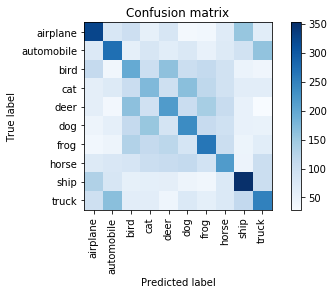

             precision    recall  f1-score   support

          0       0.32      0.33      0.32      1000
          1       0.29      0.27      0.28      1000
          2       0.19      0.20      0.19      1000
          3       0.18      0.17      0.17      1000
          4       0.21      0.22      0.21      1000
          5       0.23      0.24      0.23      1000
          6       0.26      0.26      0.26      1000
          7       0.22      0.22      0.22      1000
          8       0.34      0.35      0.35      1000
          9       0.27      0.25      0.26      1000

avg / total       0.25      0.25      0.25     10000



In [23]:
# Decision Tree report and analysis
y_pred_tree_pca = tree.predict(x_test_pca)
tree_pca_f1 = metrics.f1_score(y_test, y_pred_tree_pca, average= "weighted")
tree_pca_accuracy = metrics.accuracy_score(y_test, y_pred_tree_pca)
tree_pca_cm = metrics.confusion_matrix(y_test, y_pred_tree_pca)
print("-----------------Decision Tree Report---------------")
print("F1 score: {}".format(tree_pca_f1))
print("Accuracy score: {}".format(tree_pca_accuracy))
print("Confusion matrix: \n", tree_pca_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(tree_pca_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_tree_pca))

In [24]:
x_train_pca_cnn = x_train_pca.reshape(x_train_pca.shape[0], x_train_pca.shape[1], 1, 1)
x_test_pca_cnn = x_test_pca.reshape(x_test_pca.shape[0], x_test_pca.shape[1], 1, 1)
print(x_train_pca_cnn.shape)
print(x_test_pca_cnn.shape)

(50000, 500, 1, 1)
(10000, 500, 1, 1)


In [25]:
checkpointer = ModelCheckpoint(filepath="save/cnn_pca_cifar.hdf5", verbose=0, save_best_only=True) # save best model
input_shape = (500, 1, 1)
learning_rate = 0.001

#Build network
model = Sequential()

model.add(Conv2D(96, kernel_size=(3, 1), strides=(1, 1), padding='valid',
                 activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=input_shape)) 
model.add(Conv2D(96, kernel_size=(3, 1), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 1), strides=None, padding='valid'))
model.add(Dropout(0.57)) 

model.add(Conv2D(128, kernel_size=(3, 1), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(Conv2D(128, kernel_size=(3, 1), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 1), strides=None, padding='valid'))
model.add(Dropout(0.57)) 

model.add(Conv2D(256, kernel_size=(3, 1), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Conv2D(256, kernel_size=(3, 1), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 1), strides=None, padding='valid'))
model.add(Dropout(0.57)) 

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(y_train_tf.shape[1], activation='softmax'))

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=learning_rate), metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 498, 1, 96)        384       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 496, 1, 96)        27744     
_________________________________________________________________
batch_normalization_4 (Batch (None, 496, 1, 96)        384       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 248, 1, 96)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 248, 1, 96)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 246, 1, 128)       36992     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 244, 1, 128)       49280     
__________

In [26]:
start = time.time()

history = model.fit(x_train_pca_cnn,y_train_tf, validation_split=0.2, callbacks=[monitor,checkpointer],
                    verbose=1,epochs=50, batch_size=256, shuffle=True)      

end = time.time()
cnn_mnist_time = end-start
print("Total training time is {:0.2f} minute".format(cnn_mnist_time/60.0))

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 15s 365us/step - loss: 3.2661 - acc: 0.0988 - val_loss: 3.1144 - val_acc: 0.0981
Epoch 2/50
40000/40000 [==============================] - 11s 278us/step - loss: 2.9833 - acc: 0.1096 - val_loss: 3.4547 - val_acc: 0.0952
Epoch 3/50
40000/40000 [==============================] - 11s 265us/step - loss: 2.9000 - acc: 0.1152 - val_loss: 3.2756 - val_acc: 0.1088
Epoch 4/50
40000/40000 [==============================] - 11s 276us/step - loss: 2.8180 - acc: 0.1142 - val_loss: 3.4372 - val_acc: 0.0967
Epoch 5/50
40000/40000 [==============================] - 11s 275us/step - loss: 2.7446 - acc: 0.1137 - val_loss: 2.9546 - val_acc: 0.1056
Epoch 6/50
40000/40000 [==============================] - 12s 289us/step - loss: 2.6769 - acc: 0.1182 - val_loss: 3.3029 - val_acc: 0.1160
Epoch 7/50
40000/40000 [==============================] - 12s 294us/step - loss: 2.6181 - acc: 0.1200 - val_loss: 2.

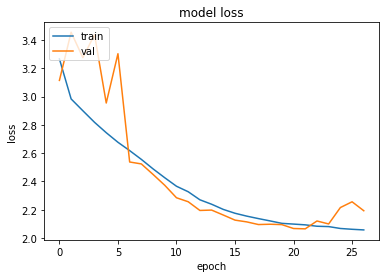

In [27]:
# plot summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
model.load_weights("save/cnn_pca_cifar.hdf5")

C:\Users\hgdan\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


-----------------Convolutional Neural Network Report---------------
F1 score: 0.20028830913858983
Accuracy score: 0.2644
Confusion matrix: 
 [[  0  75   2   1  72   2  60 119 502 167]
 [  0 181   0   0   6   0  82 119  56 556]
 [  0  72   0   1 327   7 265 180  95  53]
 [  0  95   0   1 160  24 285 347  24  64]
 [  0  52   0   0 384   2 369 113  34  46]
 [  0  90   1   1 174  37 235 387  24  51]
 [  0  36   1   0 163   0 635 134   8  23]
 [  0 157   0   0  84   4 291 306  22 136]
 [  0  86   1   0  40   3  38  67 518 247]
 [  0 167   0   0   9   0  77 117  48 582]]
Plotting confusion matrix


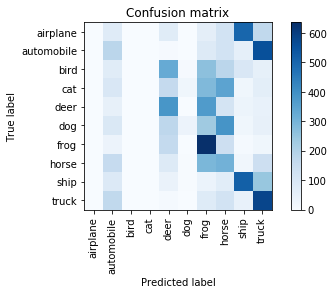

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1000
          1       0.18      0.18      0.18      1000
          2       0.00      0.00      0.00      1000
          3       0.25      0.00      0.00      1000
          4       0.27      0.38      0.32      1000
          5       0.47      0.04      0.07      1000
          6       0.27      0.64      0.38      1000
          7       0.16      0.31      0.21      1000
          8       0.39      0.52      0.44      1000
          9       0.30      0.58      0.40      1000

avg / total       0.23      0.26      0.20     10000



C:\Users\hgdan\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
cnn_pca_pred_cifar = model.predict(x_test_pca_cnn)
cnn_pca_pred_cifar = np.argmax(cnn_pca_pred_cifar,axis=1)
y_true = np.argmax(y_test_tf,axis=1)

cnn_pca_f1_cifar = metrics.f1_score(y_true, cnn_pca_pred_cifar, average= "weighted")
cnn_pca_accuracy_cifar = metrics.accuracy_score(y_true, cnn_pca_pred_cifar)
cnn_pca_cm_cifar = metrics.confusion_matrix(y_true, cnn_pca_pred_cifar)
print("-----------------Convolutional Neural Network Report---------------")
print("F1 score: {}".format(cnn_pca_f1_cifar))
print("Accuracy score: {}".format(cnn_pca_accuracy_cifar))
print("Confusion matrix: \n", cnn_pca_cm_cifar)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cnn_pca_cm_cifar, labelNames)
plt.show()

print(metrics.classification_report(y_true, cnn_pca_pred_cifar))

# Features Extraction using Autoencoder

In [12]:
filepath = "save/autoencoder_cifar.hdf5"
learning_rate = 0.001
checkpointer = ModelCheckpoint(filepath, verbose=0, save_best_only=True) # save best model
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')

input_size = (32, 32, 3)

input_image = Input(shape=input_size)

# Encoder
x = Conv2D(256, (3, 3), activation='relu', padding='same')(input_image)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same', name='encoded_layer')(x)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), padding='same')(x)

autoencoder = Model(input_image, decoded)
autoencoder.compile(optimizer=Adam(lr=learning_rate), loss='mse')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 256)       7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       295040    
_________________________________________________________________
encoded_layer (MaxPooling2D) (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 128)       0         
__________

In [13]:
start = time.time()

history = autoencoder.fit(x_train,x_train, validation_split=0.2, callbacks=[monitor,checkpointer],verbose=1,epochs=50, batch_size=256, shuffle=True)    

end = time.time()
autoencoder_time = end-start
print("Total training time is {:0.2f} minute".format(autoencoder_time/60.0))

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 20s 493us/step - loss: 0.0404 - val_loss: 0.0078
Epoch 2/50
40000/40000 [==============================] - 14s 362us/step - loss: 0.0063 - val_loss: 0.0057
Epoch 3/50
40000/40000 [==============================] - 15s 363us/step - loss: 0.0049 - val_loss: 0.0051
Epoch 4/50
40000/40000 [==============================] - 14s 361us/step - loss: 0.0044 - val_loss: 0.0041
Epoch 5/50
40000/40000 [==============================] - 14s 361us/step - loss: 0.0039 - val_loss: 0.0038
Epoch 6/50
40000/40000 [==============================] - 14s 357us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 7/50
40000/40000 [==============================] - 14s 358us/step - loss: 0.0033 - val_loss: 0.0040
Epoch 8/50
40000/40000 [==============================] - 14s 358us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 9/50
40000/40000 [==============================] - 14s 361us/step - loss: 0.0029 - val_

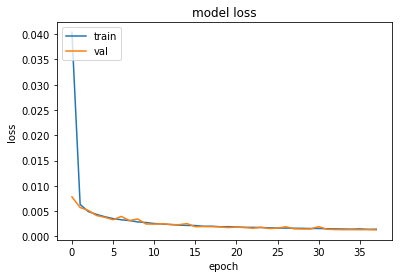

In [14]:
# plot summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
model = load_model('save/autoencoder_cifar.hdf5')
encoder_feature = Model(inputs=model.input, outputs=model.get_layer('encoded_layer').output)

encoder_feature.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 256)       7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       295040    
_________________________________________________________________
encoded_layer (MaxPooling2D) (None, 8, 8, 128)         0         
Total params: 302,208
Trainable params: 302,208
Non-trainable params: 0
_________________________________________________________________


In [16]:
autoencoder_features_train = encoder_feature.predict(x_train)
autoencoder_features_test = encoder_feature.predict(x_test)

In [17]:
autoencoder_features_train.shape

(50000, 8, 8, 128)

## Models using autoencoder extracted features

* The following models are used with the features extracted from autoencoder:
    - SVM
    - KNN
    - Random Forest
    - Decision Tree
    - CNN

In [18]:
autoencoder_features_train_flat = autoencoder_features_train.reshape(autoencoder_features_train.shape[0], autoencoder_features_train.shape[1] * autoencoder_features_train.shape[2] * autoencoder_features_train.shape[3])
autoencoder_features_test_flat = autoencoder_features_test.reshape(autoencoder_features_test.shape[0], autoencoder_features_test.shape[1] * autoencoder_features_test.shape[2] * autoencoder_features_test.shape[3])

In [19]:
autoencoder_features_test_flat.shape

(10000, 8192)

In [23]:
# SVM Model
start1 = time.time()

svc = SVC(C=1, kernel='linear', gamma="auto")
svc.fit(autoencoder_features_train_flat, y_train)

end1 = time.time()
svm_autoencoder_time = end1-start1

# KNN Model
start2 = time.time()

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(autoencoder_features_train_flat, y_train)
y_pred_knn_autoencoder = knn.predict(autoencoder_features_test_flat)

end2 = time.time()
knn_autoencoder_time = end2-start2

# Random Forest
start3 = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(autoencoder_features_train_flat, y_train)

end3 = time.time()
forest_autoencoder_time = end3-start3

# Decision Tree
start4 = time.time()

tree = DecisionTreeClassifier(max_depth=100, criterion='entropy')
tree.fit(autoencoder_features_train_flat, y_train)

end4 = time.time()
tree_autoencoder_time = end4-start4

print("SVM Time: {:0.2f} minute".format(svm_autoencoder_time/60.0))
print("KNN Time: {:0.2f} minute".format(knn_autoencoder_time/60.0))
print("Random Forest Time: {:0.2f} minute".format(forest_autoencoder_time/60.0))
print("Decision Tree Time: {:0.2f} minute".format(tree_autoencoder_time/60.0))

C:\Users\hgdan\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


SVM Time: 174.44 minute
KNN Time: 87.40 minute
Random Forest Time: 12.47 minute
Decision Tree Time: 16.86 minute


-----------------SVM Report---------------
F1 score: 0.6599004093888341
Accuracy score: 0.6586
Confusion matrix: 
 [[743  21  60  18  21   8   8   7  72  42]
 [ 42 756  15  16   3   9   5   5  29 120]
 [ 83   9 557  62  93  79  53  41  14   9]
 [ 33  21  85 515  70 156  69  27  15   9]
 [ 25   7 103  78 625  40  47  59  13   3]
 [ 18   5  86 205  51 543  26  52  10   4]
 [ 13  15  65  85  56  33 714   8   4   7]
 [ 26   9  56  52  94  71   9 664   2  17]
 [ 85  58  20  13   7   9   3   4 772  29]
 [ 58 111  13  24  14  12   9  25  37 697]]
Plotting confusion matrix


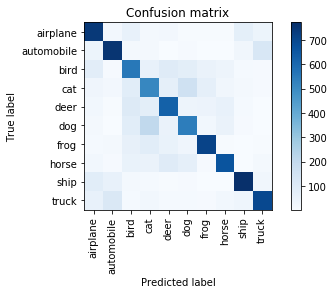

             precision    recall  f1-score   support

          0       0.66      0.74      0.70      1000
          1       0.75      0.76      0.75      1000
          2       0.53      0.56      0.54      1000
          3       0.48      0.52      0.50      1000
          4       0.60      0.62      0.61      1000
          5       0.57      0.54      0.55      1000
          6       0.76      0.71      0.73      1000
          7       0.74      0.66      0.70      1000
          8       0.80      0.77      0.78      1000
          9       0.74      0.70      0.72      1000

avg / total       0.66      0.66      0.66     10000



In [24]:
# SVM report and analysis
y_pred_svc_autoencoder = svc.predict(autoencoder_features_test_flat)
svc_autoencoder_f1 = metrics.f1_score(y_test, y_pred_svc_autoencoder, average= "weighted")
svc_autoencoder_accuracy = metrics.accuracy_score(y_test, y_pred_svc_autoencoder)
svc_autoencoder_cm = metrics.confusion_matrix(y_test, y_pred_svc_autoencoder)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_autoencoder_f1))
print("Accuracy score: {}".format(svc_autoencoder_accuracy))
print("Confusion matrix: \n", svc_autoencoder_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_autoencoder_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc_autoencoder))

-----------------K-nearest neighbors Report---------------
F1 score: 0.4385012764003542
Accuracy score: 0.4411
Confusion matrix: 
 [[613   9  88  16  40   7  46   6 170   5]
 [104 400  51  34  76  17 137  12 120  49]
 [100   4 437  54 214  29 114  17  28   3]
 [ 58  13 157 250 155 113 201  18  31   4]
 [ 48   2 186  38 552  14 113  15  30   2]
 [ 45   1 159 166 175 273 131  20  24   6]
 [ 15   1 152  48 187  16 566   3  11   1]
 [ 67  12  97  68 222  48 114 334  23  15]
 [126  31  32  31  52  13  21   4 675  15]
 [123 103  50  50  57  15 110  30 151 311]]
Plotting confusion matrix


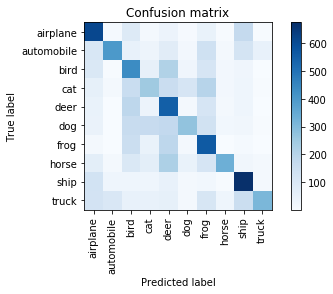

             precision    recall  f1-score   support

          0       0.47      0.61      0.53      1000
          1       0.69      0.40      0.51      1000
          2       0.31      0.44      0.36      1000
          3       0.33      0.25      0.28      1000
          4       0.32      0.55      0.40      1000
          5       0.50      0.27      0.35      1000
          6       0.36      0.57      0.44      1000
          7       0.73      0.33      0.46      1000
          8       0.53      0.68      0.60      1000
          9       0.76      0.31      0.44      1000

avg / total       0.50      0.44      0.44     10000



In [26]:
# KNN report and analysis
knn_autoencoder_f1 = metrics.f1_score(y_test, y_pred_knn_autoencoder, average= "weighted")
knn_autoencoder_accuracy = metrics.accuracy_score(y_test, y_pred_knn_autoencoder)
knn_autoencoder_cm = metrics.confusion_matrix(y_test, y_pred_knn_autoencoder)
print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_autoencoder_f1))
print("Accuracy score: {}".format(knn_autoencoder_accuracy))
print("Confusion matrix: \n", knn_autoencoder_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_autoencoder_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_knn_autoencoder))

-----------------Random Forest Report---------------
F1 score: 0.514503300246556
Accuracy score: 0.5203
Confusion matrix: 
 [[603  44  48  22  11  13  18  21 162  58]
 [ 21 662   8  14   4   9  34  16  50 182]
 [ 91  37 334  81 149  80 107  67  36  18]
 [ 46  37  59 336  73 183 128  58  24  56]
 [ 47  18  97  78 412  48 165  91  33  11]
 [ 24  24  74 198  84 399  76  67  24  30]
 [ 13  26  45  59  92  47 662  27   9  20]
 [ 34  39  31  89  71  72  64 512  15  73]
 [ 79  87  15  24   6  25   7  15 674  68]
 [ 46 190   2  31   7   8  24  27  56 609]]
Plotting confusion matrix


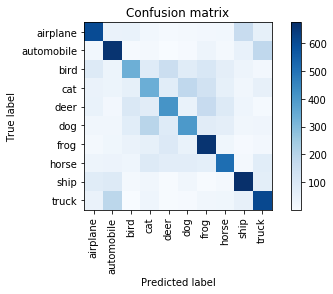

             precision    recall  f1-score   support

          0       0.60      0.60      0.60      1000
          1       0.57      0.66      0.61      1000
          2       0.47      0.33      0.39      1000
          3       0.36      0.34      0.35      1000
          4       0.45      0.41      0.43      1000
          5       0.45      0.40      0.42      1000
          6       0.52      0.66      0.58      1000
          7       0.57      0.51      0.54      1000
          8       0.62      0.67      0.65      1000
          9       0.54      0.61      0.57      1000

avg / total       0.51      0.52      0.51     10000



In [27]:
# Random Forest report and analysis
y_pred_forest_autoencoder = random_forest.predict(autoencoder_features_test_flat)
random_forest_autoencoder_f1 = metrics.f1_score(y_test, y_pred_forest_autoencoder, average= "weighted")
random_forest_autoencoder_accuracy = metrics.accuracy_score(y_test, y_pred_forest_autoencoder)
random_forest_autoencoder_cm = metrics.confusion_matrix(y_test, y_pred_forest_autoencoder)
print("-----------------Random Forest Report---------------")
print("F1 score: {}".format(random_forest_autoencoder_f1))
print("Accuracy score: {}".format(random_forest_autoencoder_accuracy))
print("Confusion matrix: \n", random_forest_autoencoder_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(random_forest_autoencoder_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_forest_autoencoder))

-----------------Decision Tree Report---------------
F1 score: 0.31537177265360006
Accuracy score: 0.3156
Confusion matrix: 
 [[394  59  86  42  58  35  33  42 176  75]
 [ 69 357  39  38  43  55  36  49  96 218]
 [ 95  36 225 111 147 107 102  98  52  27]
 [ 52  52 110 205 100 164 107 111  40  59]
 [ 53  37 136 112 281 102 130  82  22  45]
 [ 53  35 105 176 104 255  97  98  41  36]
 [ 22  37  98 123 140  87 367  65  22  39]
 [ 53  59 110  94 111 100  66 288  33  86]
 [154  80  56  40  28  40  21  41 444  96]
 [ 95 215  27  57  38  32  40  69  87 340]]
Plotting confusion matrix


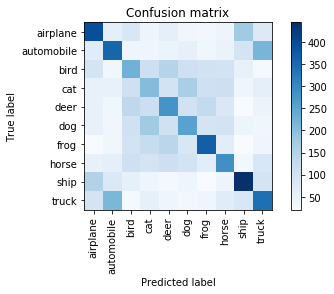

             precision    recall  f1-score   support

          0       0.38      0.39      0.39      1000
          1       0.37      0.36      0.36      1000
          2       0.23      0.23      0.23      1000
          3       0.21      0.20      0.21      1000
          4       0.27      0.28      0.27      1000
          5       0.26      0.26      0.26      1000
          6       0.37      0.37      0.37      1000
          7       0.31      0.29      0.30      1000
          8       0.44      0.44      0.44      1000
          9       0.33      0.34      0.34      1000

avg / total       0.32      0.32      0.32     10000



In [28]:
# Decision Tree report and analysis
y_pred_tree_autoencoder = tree.predict(autoencoder_features_test_flat)
tree_autoencoder_f1 = metrics.f1_score(y_test, y_pred_tree_autoencoder, average= "weighted")
tree_autoencoder_accuracy = metrics.accuracy_score(y_test, y_pred_tree_autoencoder)
tree_autoencoder_cm = metrics.confusion_matrix(y_test, y_pred_tree_autoencoder)
print("-----------------Decision Tree Report---------------")
print("F1 score: {}".format(tree_autoencoder_f1))
print("Accuracy score: {}".format(tree_autoencoder_accuracy))
print("Confusion matrix: \n", tree_autoencoder_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(tree_autoencoder_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_tree_autoencoder))

### CNN

In [29]:
checkpointer = ModelCheckpoint(filepath="save/cnn_autoencoder_cifar.hdf5", verbose=0, save_best_only=True) # save best model
input_shape = (8, 8, 128)
learning_rate = 0.001
weight_decay = 1e-4

#Build network
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_regularizer=regularizers.l2(weight_decay), 
             input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5)) 

model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5)) 

model.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_tf.shape[1], activation='softmax'))

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=10, verbose=1, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=learning_rate), metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
batch_normalization_13 (Batc (None, 8, 8, 128)         512       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
batch_normalization_14 (Batc (None, 8, 8, 128)         512       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 256)         295168    
__________

In [30]:
start = time.time()

history = model.fit(autoencoder_features_train,y_train_tf, validation_split=0.2, callbacks=[monitor, checkpointer],
                    verbose=1,epochs=200, batch_size=256, shuffle=True)      

end = time.time()
cnn_autoencoder_time = end-start
print("Total training time is {:0.2f} minute".format(cnn_autoencoder_time/60.0))

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 11s 275us/step - loss: 2.1508 - acc: 0.2826 - val_loss: 1.7157 - val_acc: 0.4165
Epoch 2/200
40000/40000 [==============================] - 7s 173us/step - loss: 1.6572 - acc: 0.4439 - val_loss: 1.6182 - val_acc: 0.4733
Epoch 3/200
40000/40000 [==============================] - 7s 175us/step - loss: 1.4659 - acc: 0.5363 - val_loss: 1.6529 - val_acc: 0.4991
Epoch 4/200
40000/40000 [==============================] - 7s 174us/step - loss: 1.3465 - acc: 0.5868 - val_loss: 1.4696 - val_acc: 0.5622
Epoch 5/200
40000/40000 [==============================] - 7s 171us/step - loss: 1.2537 - acc: 0.6264 - val_loss: 1.2602 - val_acc: 0.6217
Epoch 6/200
40000/40000 [==============================] - 7s 172us/step - loss: 1.1721 - acc: 0.6528 - val_loss: 1.6985 - val_acc: 0.5014
Epoch 7/200
40000/40000 [==============================] - 7s 171us/step - loss: 1.1349 - acc: 0.6734 - val_loss: 1

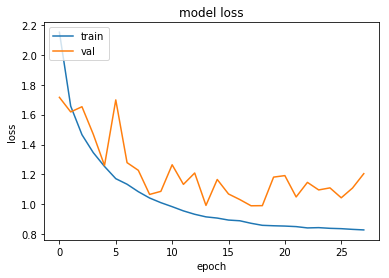

In [31]:
# plot summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
model.load_weights('save/cnn_autoencoder_cifar.hdf5') # load weights from best model

-----------------Convolutional Neural Network Report---------------
F1 score: 0.7496995070496423
Accuracy score: 0.7466
Confusion matrix: 
 [[796  17  39  31   4   0   4   5  77  27]
 [  8 851   5  19   0   2  16   2  38  59]
 [ 70   1 707  84  34  40  38  14   9   3]
 [ 21   5  81 653  34 116  42  22  18   8]
 [ 19   1 139  86 625  29  46  47   8   0]
 [ 11   3  60 265  39 560  21  30   8   3]
 [ 10   3  50  76  11  13 823   3  11   0]
 [ 13   4  39  97  25  42   8 759   5   8]
 [ 41  21  15  22   2   4   3   3 883   6]
 [ 28  49  18  41   1   4   8   6  36 809]]
Plotting confusion matrix


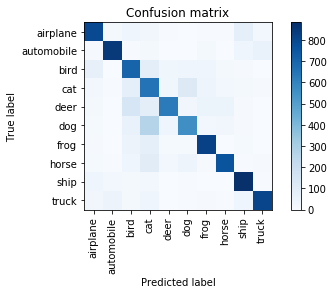

             precision    recall  f1-score   support

          0       0.78      0.80      0.79      1000
          1       0.89      0.85      0.87      1000
          2       0.61      0.71      0.66      1000
          3       0.48      0.65      0.55      1000
          4       0.81      0.62      0.70      1000
          5       0.69      0.56      0.62      1000
          6       0.82      0.82      0.82      1000
          7       0.85      0.76      0.80      1000
          8       0.81      0.88      0.84      1000
          9       0.88      0.81      0.84      1000

avg / total       0.76      0.75      0.75     10000



In [33]:
cnn_autoencoder_pred_cifar = model.predict(autoencoder_features_test)
cnn_autoencoder_pred_cifar = np.argmax(cnn_autoencoder_pred_cifar,axis=1)
y_true = np.argmax(y_test_tf,axis=1)

cnn_autoencoder_f1_cifar = metrics.f1_score(y_true, cnn_autoencoder_pred_cifar, average= "weighted")
cnn_autoencoder_accuracy_cifar = metrics.accuracy_score(y_true, cnn_autoencoder_pred_cifar)
cnn_autoencoder_cm_cifar = metrics.confusion_matrix(y_true, cnn_autoencoder_pred_cifar)
print("-----------------Convolutional Neural Network Report---------------")
print("F1 score: {}".format(cnn_autoencoder_f1_cifar))
print("Accuracy score: {}".format(cnn_autoencoder_accuracy_cifar))
print("Confusion matrix: \n", cnn_autoencoder_cm_cifar)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cnn_autoencoder_cm_cifar, labelNames)
plt.show()

print(metrics.classification_report(y_true, cnn_autoencoder_pred_cifar))